<a href="https://colab.research.google.com/github/minhpham0201/MED-MCQA/blob/master/Prepare_Train_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Translate French Dataset from French -> English

In [ ]:
!pip install transformers datasets -q
!pip install torch -q
!pip install sentencepiece -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 93.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.2 MB/s eta 0:00:00


In [ ]:
!pip install deep-translator -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.2 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
import datasets

In [ ]:
french_mcqa = load_dataset('qanastek/frenchmedmcqa')

In [ ]:
french_mcqa['train'][0]

{'id': '230bac49b0fe863b772410bc8d01a025f63c3c999065480131d6334abd2efeff',
 'question': 'Parmi les affirmations suivantes, une seule est fausse, indiquer laquelle: les particules alpha',
 'answer_a': "Sont formées de noyaux d'hélium",
 'answer_b': 'Sont peu pénétrantes',
 'answer_c': "Toute l'énergie qu'elles transportent est cédée au long d'un parcours de quelques centimètres dans l'air",
 'answer_d': 'Sont arrêtées par une feuille de papier',
 'answer_e': 'Sont peu ionisantes',
 'correct_answers': [4],
 'number_correct_answers': 0}

In [ ]:
from deep_translator import GoogleTranslator

def translate_text(text):
    translator = GoogleTranslator(source='fr', target='en')
    try:
        trans_text = translator.translate(text)
        return trans_text

    except Exception as e:
        return "Error: " + str(e)

In [ ]:
def translate_text_google(example):
    question = example['question']
    opa = example['answer_a']
    opb = example['answer_b']
    opc = example['answer_c']
    opd = example['answer_d']

    return {
        'trans_question': translate_text(question),
        'trans_opa': translate_text(opa),
        'trans_opb': translate_text(opb),
        'trans_opc': translate_text(opc),
        'trans_opd': translate_text(opd)
    }

In [ ]:
from datasets import load_from_disk
import pandas as pd

trans_french_path = '/content/drive/MyDrive/french/'
trans_french = load_from_disk(trans_french_path)

trans_french['train'][0]

{'correct_answers': [4],
 'number_correct_answers': 0,
 'trans_question': 'Of the following statements, only one is false, indicating which: alpha particles',
 'trans_answer_a': 'Are formed of helium nuclei',
 'trans_answer_b': 'Are little penetrating',
 'trans_answer_c': 'All the energy they carry is transferred along a few centimetres in the air.',
 'trans_answer_d': 'Are stopped by a sheet of paper',
 'trans_answer_e': 'Are little ionizing'}

In [ ]:
french_mcqa_trans = french_mcqa.map(translate_text_google, num_proc=4)

Map (num_proc=4):   0%|          | 0/2171 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/312 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/622 [00:00<?, ? examples/s]

In [ ]:
pd.DataFrame(french_mcqa_trans['train']).sample(3)

,id,question,answer_a,answer_b,answer_c,answer_d,answer_e,correct_answers,number_correct_answers,trans_question,trans_opa,trans_opb,trans_opc,trans_opd
299,9ee02153253e0a08b7cfd1caf5c9e53de5e004ecbd37e1...,Parmi les propositions suivantes concernant le...,Le CMV donne un effet cytopathique rapide (en ...,La recherche précoce des antigènes du CMV par ...,Le CMV est excrêté de façon prolongée dans les...,Il est possible de rechercher le CMV dans les ...,L'aspect du frottis sanguin permet d'effectuer...,"[1, 2, 3]",2,Which of the following statements regarding th...,CMV gives a rapid cytopathic effect (in 24 hou...,Early detection of CMV antigens using monoclon...,CMV is excreted over a prolonged period in the...,It is possible to test for CMV in circulating ...
503,6dde69268d517f9b43ad71b8c07e7be7a126b7fbb1522c...,Lesquelles de ces cellules sont dérivées de la...,Cellules voilées de la lymphe,Cellules folliculaires dendritiques des gangli...,Cellules de Küpffer du foie,Histiocytes tissulaires,Cellules de la microglie,"[0, 2, 3, 4]",3,Which of these cells are derived from the mono...,Veiled lymph cells,Follicular dendritic cells of lymph nodes,Liver Küpffer cells,Tissue histiocytes
1093,b15cf26186dc1a884ac05dfe8627b7dc27e550763e29ad...,Parmi les effets indésirables des neuroleptiqu...,hyposialorrhée,hypersialorrhée,prise de poids,somnolence,dyskinésie,"[0, 1, 2, 3, 4]",4,Side effects of neuroleptics include:,hyposialorrhea,hypersialorrhea,weight gain,drowsiness


In [ ]:
train_question = french_mcqa_trans['train']['trans_question']
train_question = french_mcqa_trans['validation']['trans_question']
train_question = french_mcqa_trans['test']['trans_question']

In [ ]:
french_mcqa_trans = french_mcqa_trans.select_columns(['trans_question','trans_opa','trans_opb','trans_opc','trans_opd','correct_answers'])

In [ ]:
french_mcqa_trans.save_to_disk("/content/drive/MyDrive/frenchMCQA")

Saving the dataset (0/1 shards):   0%|          | 0/2171 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/312 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/622 [00:00<?, ? examples/s]

# Translate Corpus Tam Anh to English

In [ ]:
import textwrap
import os
import json
import re
import tqdm as tq
from pprint import pprint

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from datasets import Dataset
import torch

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
root = r'/content/drive/MyDrive/corpus'   # Root to corpus folder
list_file = os.listdir(root)

corpus_dict = {}
for file in list_file:
    with open(os.path.join(root,file), 'r', encoding='utf-8') as f:
        content = f.read()
        corpus_dict[file] = content

# Save the data to the JSON file
json_file_path = '/content/drive/MyDrive/corpus_raw.json'

with open(json_file_path, 'w', encoding='utf-8') as json_file:
    json.dump(corpus_dict, json_file, ensure_ascii=False, indent=4)

print(f"Data saved to {json_file_path}")

Data saved to /content/drive/MyDrive/corpus_raw.json


In [ ]:
# Load corpus_raw.json
json_file_path = '/content/drive/MyDrive/corpus_raw.json'

with open(json_file_path, 'r', encoding='utf-8') as json_file:
    corpus_raw = json.load(json_file)

In [ ]:
trans_corpus['Áp xe hậu môn']

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

def clean_text(text):
    cleaned_text = text
    len_original = len(text)

    # Remove Header until the end of </h1>
    pattern = r'https://tamanhhospital.*?</h1>'
    cleaned_text = re.sub(pattern, '', cleaned_text, flags=re.DOTALL)

    # Cắt Muc Lục
    pattern = r'<h3>Mục lục<\/h3>(.*?)<h2>'
    cleaned_text = re.sub(pattern, '<h2>', cleaned_text, flags=re.DOTALL)

    # Remove Footer
    pattern1 = r'<strong>HỆ THỐNG BỆNH VIỆN ĐA KHOA TÂM ANH</strong>.*?<strong>https://tamanhhospital.vn</strong>'
    cleaned_text = re.sub(pattern1,'', cleaned_text, flags=re.DOTALL)

    pattern2 = r'<strong>HỆ THỐNG BỆNH VIỆN ĐA KHOA TÂM ANH</strong>.*?https://www.facebook.com/benhvientamanh'
    cleaned_text = re.sub(pattern2,'', cleaned_text, flags=re.DOTALL)


    # Remove all text in <h1>, <h2>, <h3>. Header chỉ chứa text đơn thuần chứ không có ý nghĩa gì. Trong nội dung cũng đã có sẵn thông tin
    cleaned_text = re.sub(r'<h1>.*?</h1>', '', cleaned_text, flags=re.DOTALL)
    cleaned_text = re.sub(r'<h2>.*?</h2>', '', cleaned_text, flags=re.DOTALL)
    cleaned_text = re.sub(r'<h3>.*?</h3>', '', cleaned_text, flags=re.DOTALL)

    #Remove html tags
    cleaned_text = re.sub(r'<.*?>', '', cleaned_text)

    # replace speacial html character :
    pattern = r'&#[0-9]+;'
    cleaned_text = re.sub(pattern, '', cleaned_text)

    len_new = len(cleaned_text)

    print('\n*************************************')
    print('--> Cleaning text done!!!')
    print(f'length of original text: {len_original}')
    print(f'length of cleaned text: {len_new}\n')

    # Split cleaned text into lines (a paragraph)
    lines = cleaned_text.split('\n')
    cleaned_lines = []

    for line in lines:
        line = line.strip()
        length = len(line)

        if line != '':
            cleaned_lines.append(line)

    # Combine short paragraphs into the previous line to remove bullet points when listing info into small sentences
    cleaned_lines_condense = ['']
    for i in range(len(cleaned_lines)):
        line = cleaned_lines[i]
        if len(line) > 140: # len > 140 is a good line of text
            cleaned_lines_condense.append(line)
        else:
            line = line.replace('.',',')
            cleaned_lines_condense[-1] = cleaned_lines_condense[-1] + ' ' + line

    return cleaned_lines_condense  # Return a list of paragraphs


def translate_paragraphs(paragraphs: list, name=None):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    model_name = "VietAI/envit5-translation"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)

    translated_paragraphs = []

    print(f'--> Translating text in: {name}')

    # Encode the batch of paragraphs
    inputs = tokenizer(paragraphs, return_tensors="pt", padding=True, truncation=True, max_length=1680)
    input_ids = inputs.input_ids.to(device)
    attention_mask = inputs.attention_mask.to(device)

    # Generate translations for the batch
    outputs = model.generate(input_ids, attention_mask=attention_mask, max_length=2048)
    translated_texts = tokenizer.batch_decode(outputs, skip_special_tokens=True)

    translated_paragraphs.extend(translated_texts)
    return translated_paragraphs

def get_title(doc):
    title = doc.split("\n")[5]
    if ':' in title:
      title = title.split(':')[0]
    if '?' in title:
      title = title.split('?')[0]
    if 'là' in title:
      title = title.split('là')[0]
    if '(' in title:
      title = title.split('(')[0]
    if '&#8211' in title:
      title = title.split('&#8211')[0]
    if '&#038' in title:
      title = title.split('&#038')[0]

    return title

def translate_corpus(corpus_path, output_path='trans_corpus.json'):
    corpus_path = corpus_path
    output_path = output_path

    with open(corpus_path, 'r', encoding='utf-8') as f:
        corpus = json.load(f)

    trans_corpus = {}

    for k, v in tq.tqdm(corpus.items()):
        name = get_title(v)
        paragraphs = clean_text(v)

        translated_paragraphs = translate_paragraphs(paragraphs, name=name)
        trans_corpus[name] = translated_paragraphs

        # Save the data to JSON file after being translated
        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump(trans_corpus, f, ensure_ascii=False, indent=4)
            print(f"\nData saved to {output_path}")


In [ ]:
translate_corpus(corpus_path = '/content/drive/MyDrive/corpus_raw.json')

In [ ]:
import pandas as pd

corpus_new = pd.read_csv('/content/drive/MyDrive/data_new.csv')
corpus_new = corpus_new.sort_values(by='Url')
long_text = corpus_new.loc[corpus_new['Url'] == 'tieu-buot']['Content'].iloc[1]

In [ ]:
corpus_new.loc[corpus_new['Url'] == 'tieu-buot']['Content'].iloc[6]

'Đi tiểu buốt là dấu hiệu của một số bệnh lý đường tiết niệu. Nếu không được điều trị kịp thời, người bệnh có thể gặp các biến chứng bao gồm: 1. Viêm bàng quang Vi khuẩn làm người bệnh tiểu buốt, tiểu gắt có thể theo niệu quản tấn công vào bàng quang gây viêm nhiễm hoặc do vi khuẩn có trong máu hoặc hệ thống bạch huyết. Thông thường, viêm bàng quang do nhiễm trùng tiểu thấp phổ biến hơn. 2. Viêm bể thận Ngoài tấn công bàng quang, vi khuẩn còn có thể tấn công bể thận làm cho thận bị sưng tấy và có nguy cơ tổn thương không phục hồi. Người bị viêm bể thận dễ chuyển thành mạn tính, đe dọa đến tính mạng. 3. Nhiễm trùng đường tiết niệu Từ những dấu hiệu ban đầu là tiểu buốt, người bệnh có thể bị nhiễm trùng đường tiết niệu, nếu không được điều trị sớm và đúng phác đồ. Đó là cơ hội phát sinh các biến chứng nguy hiểm liên quan đến hệ tiết niệu và nặng nề nhất là gây tổn thương thận.'

In [ ]:
!pip install deep-translator -q

In [ ]:
! pip install transformers -q

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners import open_spinner
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/spinners.py", line 9, in <module>
    from pip._internal.utils.logging import get_indentation
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/util

In [ ]:
from deep_translator import GoogleTranslator
from transformers import pipeline

def translate_text(text):
    translator = GoogleTranslator(source='vi', target='en')
    try:
        trans_text = translator.translate(text)
        return trans_text

    except Exception as e:
        return "Error: " + str(e)

In [ ]:
# google/pegasus-large
from transformers import pipeline

def summarize_text(text):
    summarizer = pipeline("summarization", model='facebook/bart-large-cnn')#'facebook/bart-large-cnn'
    summary = summarizer(text, min_length=300, max_length=450)
    return summary[0]['summary_text']

In [ ]:
##time
text = '''
'Unpredictable weather changes: Sudden changes in weather, especially during the changing seasons of the year in the North of our country, can easily cause congestive sore throat. This is because the body cannot adapt to changes in the environment, leading to reduced resistance and easy damage to the oropharynx. Immune deficiency: People with diseases such as HIV/AIDS, diabetes, malnutrition, cancer... are more susceptible to congestive sore throat due to poor resistance to pathogens. Gastroesophageal reflux: Reflux of stomach acid can cause burning or ulcers in the nasopharynx, creating favorable conditions for viruses and bacteria to penetrate and cause infection. Environmental pollution: Smoky and chemical environments can increase the risk of congestive sore throat. Smoking: Smoking or frequent exposure to tobacco is one of the common factors that increases the risk of respiratory diseases, including congestive pharyngitis. Improper diet: Frequently eating spicy, hot foods, foods that are too hard, drinking a lot of alcohol can also cause damage to the throat mucosa. Stress and prolonged stress: Psychological instability, staying up late, and depression are also factors that affect health and increase the risk of congestive sore throat. Occupation: Occupations that require a lot of speaking and singing such as singers, speakers, teachers... are also more susceptible to damage to the throat mucosa than other people. Unpredictable weather changes: Sudden changes in weather, especially during the changing seasons of the year in the North of our country, can easily cause congestive sore throat. This is because the body cannot adapt to changes in the environment, leading to reduced resistance and easy damage to the oropharynx. Immune deficiency: People with diseases such as HIV/AIDS, diabetes, malnutrition, cancer... are more susceptible to congestive sore throat due to poor resistance to pathogens. Gastroesophageal reflux: Reflux of stomach acid can cause burning or ulcers in the nasopharynx, creating favorable conditions for viruses and bacteria to penetrate and cause infection. Environmental pollution: Smoky and chemical environments can increase the risk of congestive sore throat. Smoking: Smoking or frequent exposure to tobacco is one of the common factors that increases the risk of respiratory diseases, including congestive pharyngitis. Improper diet: Frequently eating spicy, hot foods, foods that are too hard, drinking a lot of alcohol can also cause damage to the throat mucosa. Stress and prolonged stress: Psychological instability, staying up late, and depression are also factors that affect health and increase the risk of congestive sore throat. Occupation: Occupations that require a lot of speaking and singing such as singers, speakers, teachers... are also more susceptible to damage to the throat mucosa than other people.'
'''
summarize_text(text)

' Sudden changes in weather, especially during the changing seasons of the year in the North of our country, can easily cause congestive sore throat . This is because the body cannot adapt to changes in the environment, leading to reduced resistance and easy damage to the oropharynx . Smoking or frequent exposure to tobacco is one of the common factors that increases the risk of respiratory diseases, including congestive pharyngitis . People with diseases such as HIV/AIDS, diabetes, malnutrition, cancer... are more susceptible to . poor resistance to pathogens . Eating spicy, hot foods, . foods that are too hard, drinking a lot of alcohol can also cause damage to throat mucosa . Stress and prolonged stress are also factors that affect health and increase the . risk of congestive . throat . Occupation: Occupations that require a . lot of speaking and singing such as singers, speakers, teachers... are also susceptible to damage to mucosa than other people . People . are also more prone t

In [ ]:
text

"\n'Unpredictable weather changes: Sudden changes in weather, especially during the changing seasons of the year in the North of our country, can easily cause congestive sore throat. This is because the body cannot adapt to changes in the environment, leading to reduced resistance and easy damage to the oropharynx. Immune deficiency: People with diseases such as HIV/AIDS, diabetes, malnutrition, cancer... are more susceptible to congestive sore throat due to poor resistance to pathogens. Gastroesophageal reflux: Reflux of stomach acid can cause burning or ulcers in the nasopharynx, creating favorable conditions for viruses and bacteria to penetrate and cause infection. Environmental pollution: Smoky and chemical environments can increase the risk of congestive sore throat. Smoking: Smoking or frequent exposure to tobacco is one of the common factors that increases the risk of respiratory diseases, including congestive pharyngitis. Improper diet: Frequently eating spicy, hot foods, food

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

In [ ]:
sw = stopwords.words('english')

In [ ]:
punc = '!"#$%&\()*+,-–./:;<=>?@[\\]^_{|}~…' # Chua bo ' va `
def cleanSent(sent):
    arr = []
    for c in sent:
        if c not in punc:
            arr.append(c)
    return ''.join(arr)
def cleanVN(text):
    sentences = sent_tokenize(long_text)
    sents = []
    for sent in sentences:
        if len(sent) > 5:
            sents.append(cleanSent(sent))
    return '. '.join(sents)

In [ ]:
def cleanText(long_text):
    sentences = sent_tokenize(translate_text(long_text))
    sents = []
    for sent in sentences:
        if len(sent) > 5:
            sents.append(cleanSent(sent))
    arr = []
    for sent in sents:
        arr.append([w for w in word_tokenize(sent) if w.lower() not in sw])
    return '. '.join([' '.join(line) for line in arr]).replace(" 's", "'s")

In [ ]:
cleaned_text = cleanText(long_text)
cleaned_text

"Cystitis Another cause painful urination cystitis inflammation bladder mucosa interstitial cystitis. symptoms also include pain tenderness bladder pelvic area. cases radiation therapy cause bladder pain affect organs urinary tract. condition called radiation cystitis. Urethritis Urethritis usually caused bacterial attack. condition causes pain urinating also increase feeling needing urinate frequently. Epididymitis Painful urination also caused epididymitis men. epididymis located back testicles functions store transport sperm testicles. Pelvic inflammatory disease PID Pelvic inflammatory disease serious infection often caused bacteria affect fallopian tubes ovaries cervix uterus causing abdominal pain pain sex painful urination symptoms. Ureteral obstruction Ureteral obstruction prevents urine escaping flows back kidneys causing urinary tract infection. also one causes frequent urination painful urination unclean urination 9. Urinary tract stones Urinary tract stones formed crystal d

In [ ]:
from transformers import AutoTokenizer

In [ ]:
# Loai sw
len(word_tokenize(cleaned_text)) # Tach tu " "

382

In [ ]:
from nltk.tag import pos_tag
#
#pos_tag(tokenizer.tokenize(text_clean))

In [ ]:
word_tokenize("patient's")

['patient', "'s"]

In [ ]:
#sw

In [ ]:
# arr = []
# for w in word_tokenize(translate_text(long_text)):
#     if w not in sw:
#         arr.append(w)
# ' '.join([''.join(row) for row in arr]).replace(" 's", "'s")

In [ ]:
sum_long[0]['summary_text']

' Painful urination is a fairly broad term used to describe the burning, stinging feeling every time you urinate . This is the result of irritation of the bladder and urethra . The most common cause is lower urinary tract infection (cystitis, urethritis, prostate), but it can also be upper urinary tract infections . Urinary tract stones are caused by crystal deposits, which cause the urine flow to be obstructed or obstructed . Some medications such as cancer drugs and some antibiotics can cause painful urination as a side effect . The symptoms of prostate prostate and epidididymitis are less common in young men due to its association with prostatic hyperplasia, which is associated with prostatitis . The pain is also caused by epidididymis, which functions to store and transport sperm from the back of the testicles, and is a condition specific to men . People with urinary tract stones will feel uncomfortable when urinating and have sharp pain when they are'

In [ ]:
pip install transformers -q

In [ ]:
from transformers import AutoTokenizer
modelname = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(modelname)

In [ ]:
len(tokenizer.tokenize(cleaned_text))

Token indices sequence length is longer than the specified maximum sequence length for this model (536 > 512). Running this sequence through the model will result in indexing errors


536

## Translate File Corpus New to English

In [ ]:
import pandas as pd
corpus_new = pd.read_csv('/content/drive/MyDrive/data_new.csv')
#corpus_new = corpus_new.sort_values(by='Url')
corpus_new

,Url,Field,Title,Content
0,alzheimer,Thần kinh,Triệu chứng thường gặp của hội chứng Alzheimer,Bộ não của chúng ta được tạo thành từ hơn 100 ...
1,alzheimer,Thần kinh,Cách phòng tránh,Bệnh Alzheimer xảy ra do tiến trình lão hóa nã...
2,alzheimer,Thần kinh,Các biến chứng,"Mất trí nhớ và ngôn ngữ, suy giảm khả năng phá..."
3,alzheimer,Thần kinh,Chăm sóc bệnh nhân,"Để chăm sóc tốt cho người bệnh Alzheimer, ngườ..."
4,alzheimer,Thần kinh,Câu hỏi thường gặp,Việc chăm sóc bệnh nhân mắc Alzheimer giai đoạ...
...,...,...,...,...
5569,yeu-sinh-ly-o-nu,Sản - Phụ khoa,Yếu sinh lý ở nữ giới có giống nam giới không?,"Một nghiên cứu tại Anh cho kết quả, nữ giới có..."
5570,yeu-sinh-ly-o-nu,Sản - Phụ khoa,Yếu sinh lý nữ có phòng ngừa được không?,Yếu sinh lý ở nữ không chỉ làm giảm chất lượng...
5571,yeu-sinh-ly-o-nu,Sản - Phụ khoa,Nguyên nhân khiến phụ nữ bị suy giảm ham muốn ...,"Bác sĩ Mai Ngân chia sẻ, có rất nhiều nguyên n..."
5572,yeu-sinh-ly-o-nu,Sản - Phụ khoa,Chẩn đoán yếu sinh lý ở nữ như thế nào?,"Bác sĩ Mai Ngân nhắn nhủ, khi nhận thấy các dấ..."


In [ ]:
# Check max length Content
corpus_new['Length'] = corpus_new['Content'].apply(len)
max_length = corpus_new['Length'].max()
print(max_length)
#corpus_new.loc[corpus_new["Length"]==max_length]
longest_text = corpus_new.iloc[3637]['Content']

12397


In [ ]:
df2 = corpus_new.loc[(corpus_new["Length"] >= 5000)]
df2.shape

(34, 5)

In [ ]:
cleanVN(df2.loc[93]['Content'])

NameError: ignored

In [ ]:
df3 = df2['Content'].apply(translate_text)
df3
# Gioi han Translate la length<5000
# Co tong cong 34 doan >= 5000 => Can xu ly 34 doan nay

93      Error: Nguyên nhân gây bệnh chưa rõ ràng. Một ...
174     Error: Các loại thuốc chống co giật được sử dụ...
291     Error: 7. Viêm phổi Viêm phổi có thể do virus ...
356     Error: Phòng bệnh là biện pháp quan trọng lại ...
367     Error: Bệnh nhân có u tuyến ức: Khoảng 10 đến ...
393     Error: 6. Khi nào người bệnh cần gặp bác sĩ? T...
488     Error: Trong số hàng trăm bệnh lý thần kinh, c...
682     Error: Nhiễm vi khuẩn Haemophilus influenzae t...
970     Error: Một cách khác để điều trị tình trạng tu...
1084    Error: Bên cạnh việc thực hiện các kỹ thuật hi...
1091    Error: Viêm giác mạc có thể do tiếp xúc quá nh...
1168    Error: Trong hầu hết các trường hợp, nguyên nh...
1181    Error: Xem thêm: Đau nửa đầu bên trái: Nguyên ...
1892    Error: Hiện nay vẫn chưa có phương pháp điều t...
1896    Error: Không chỉ lupus ban đỏ mà những bệnh cơ...
2251    Error: Theo bác sĩ Thuý Hằng, tình trạng 1 bên...
2256    Error: Điều trị các nguyên nhân gây ra tình tr...
2422    Error:

In [ ]:
df3[df3.str.contains('Error: ')].shape

(34,)

In [ ]:
second_longest_text = corpus_new['Content'][2422]
translate_text(second_longest_text)


'Error: Nhiễm trùng hậu sản là hậu quả không mong muốn thường gặp nhất và là nguyên nhân gây tử vong ở sản phụ. Bệnh để lại hậu quả nặng nề cho sản phụ và em bé sơ sinh do kéo dài thời gian nằm viện, ảnh hưởng đến sức khỏe và tăng chi phí điều trị. Nhiễm khuẩn hậu sản có thể diễn tiến nhanh, cấp tính đưa đến nhiễm trùng toàn thân nghiêm trọng; một số trường hợp có diễn tiến âm thầm gây ra viêm vùng chậu mãn tính. Một số hình thái thường gặp khi bị nhiễm trùng sau khi sinh là: 1. Nhiễm khuẩn tầng sinh môn, âm hộ, âm đạo Đây là hình thái nhẹ nhất. Do rách hoặc không cắt tầng sinh môn mà không khâu hoặc khâu không đúng kỹ thuật, không đảm bảo vô khuẩn, sót gạc trong âm đạo. Triệu chứng: sốt nhẹ 38-38,5 độ C, vết khâu tầng sinh môn sưng tấy, đau, trường hợp nặng có mủ. Tử cung co hồi bình thường, sản dịch không hôi. Bệnh nhân sẽ tiến triển tốt nếu điều trị kịp thời. Điều trị: Sản phụ sẽ được cắt chỉ tầng sinh môn nếu vết khâu tấy đỏ có mủ. Vệ sinh tại chỗ hàng ngày bằng oxy già (vết khâu c

In [ ]:
content_max = corpus_new.iloc[2765]['Content']
content_max

'Bác sĩ chuyên khoa tâm lý, tâm thần sẽ có một số bước để giúp chẩn đoán rối loạn lo âu. Đầu tiên, họ sẽ đặt câu hỏi chi tiết về các triệu chứng và bệnh sử. Tâm lý gia và bác sĩ tâm thần sẽ tìm hiểu triệu chứng và cuộc sống của bệnh nhân qua trò chuyện lâm sàng.(2) Để chẩn đoán mắc rối loạn lo âu, các tiêu chí nêu ra trong hướng dẫn chẩn đoán và thống kê các rối loạn tâm thần (DSM). Hướng dẫn này được công bố bởi Hiệp hội Tâm thần Mỹ và được sử dụng bởi các chuyên gia sức khỏe tâm thần Các tiêu chí sau đây phải được đáp ứng cho một chẩn đoán rối loạn lo âu: Quá nhiều lo lắng và lo lắng về một số sự kiện hoặc hoạt động của hầu hết các ngày trong tuần, ít nhất sáu tháng. Khó khăn trong việc kiểm soát các cảm xúc lo lắng. Lo âu hoặc lo lắng là nguyên nhân gây căng thẳng đáng kể hoặc gây trở ngại cho cuộc sống hàng ngày. Lo lắng không liên quan đến một tình trạng sức khỏe tâm thần, chẳng hạn như các cuộc tấn công hoảng loạn, lạm dụng chất hoặc rối loạn căng thẳng hậu chấn thương tâm lý (PT

In [ ]:
!pip install deep_translator -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.3 MB/s eta 0:00:00


In [ ]:
!pip install deep_translator -q
from deep_translator import GoogleTranslator

def translate_text(text):
    translator = GoogleTranslator(source='vi', target='en')
    try:
        trans_text = translator.translate(text)
        return trans_text

    except Exception as e:
        return "Error: " + str(e)

In [ ]:
%%time
text = 'Bình và An là đôi bạn thân, Bình mắc tay chân miệng, An bị bệnh đau bao tử. Hỏi An bị bệnh gì?'

translate_text(text)

CPU times: user 90.2 ms, sys: 2.19 ms, total: 92.4 ms
Wall time: 626 ms


'Binh and An are close friends. Binh has hand, foot and mouth disease, and An has a stomachache. Ask What disease does An have?'

In [ ]:
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

#corpus_new['Trans_Content'] = corpus_new['Content'].progress_apply(translate_text)

corpus_new['Trans_Content'] = corpus_new['Content'].progress_apply(cleanText)


In [ ]:
corpus_new

,Url,Title,Content,Length,Trans_Content
0,alzheimer,"Bệnh Alzheimer: Nguyên nhân, triệu chứng, điều...",Bệnh Alzheimer là nguyên nhân hàng đầu gây nên...,275,Alzheimer's disease is the leading cause of de...
5473,alzheimer,Biện pháp điều trị,Bệnh Alzheimer không có thuốc điều trị nhưng n...,903,"There is no cure for Alzheimer's disease, but ..."
1862,alzheimer,Bệnh Alzheimer là gì?,Alzheimer là một căn bệnh gây ra tình trạng mấ...,535,Alzheimer's is a disease that causes memory lo...
2127,alzheimer,Nguyên nhân,Não là bộ phận tiêu thụ tới 20% lượng oxy của ...,2248,The brain is the organ that consumes up to 20%...
2206,alzheimer,Các biến chứng,"Mất trí nhớ và ngôn ngữ, suy giảm khả năng phá...",1271,"Memory and language loss, impaired judgment, a..."
...,...,...,...,...,...
2798,yeu-sinh-ly-o-nu,Dấu hiệu nhận biết yếu sinh lý ở nữ,"Khác với nam giới, nữ giới thường e dè và ngại...",283,"Unlike men, women are often shy and shy when i..."
5332,yeu-sinh-ly-o-nu,Yếu sinh lý ở nữ là gì?,Yếu sinh lý ở nữ là tình trạng suy giảm ham mu...,230,Erectile dysfunction in women is a condition o...
602,yeu-sinh-ly-o-nu,"Yếu sinh lý ở nữ: Nguyên nhân, biểu hiện và cá...",Nhiều chị em nghĩ rằng yếu sinh lý chỉ xảy ra ...,392,Many women think that erectile dysfunction onl...
4573,yeu-sinh-ly-o-nu,Nguyên nhân khiến phụ nữ bị suy giảm ham muốn ...,"Bác sĩ Mai Ngân chia sẻ, có rất nhiều nguyên n...",191,Dr. Mai Ngan shared that there are many causes...


In [ ]:
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()
corpus_new['Trans_Title'] = corpus_new['Title'].progress_apply(translate_text)

  0%|          | 0/5567 [00:00<?, ?it/s]

In [ ]:
corpus_new.to_csv('/content/drive/MyDrive/trans_corpus_new.csv')

In [ ]:
trans_corpus_new = pd.read_csv('/content/drive/MyDrive/trans_corpus_new.csv',index_col='Unnamed: 0')

trans_corpus_new.head(5)

FileNotFoundError: ignored

In [ ]:
# Error Items when translate in except Block
trans_corpus_new.loc[(trans_corpus_new['Trans_Content'].str.contains('Error:')) | (trans_corpus_new['Trans_Title'].str.contains('Error:'))]

,Url,Title,Content,Trans_Title,Trans_Content


In [ ]:
trans_corpus_new.iloc[4591]['Content']

In [ ]:
trans_corpus_new.iloc[4591]['Trans_Title'] = 'What is Atopic dermatitis (eczema)?'

In [ ]:
trans_corpus_new.iloc[3637]['Content'] = "Nguyên nhân đi tiểu buốt: Nhiễm trùng đường tiết niệu, Nhiễm bệnh lây truyền qua đường tình dục (STIs), Viêm tuyến tiền liệt, Viêm bàng quang, Viêm niệu đạo, Viêm mào tinh hoàn, Bệnh viêm vùng chậu (PID), Tắc nghẽn niệu quản, Sỏi đường tiết niệu, Thuốc, Sản phẩm vệ sinh. Nhiễm trùng đường tiết niệu. Đi tiểu đau rát là một dấu hiệu phổ biến của tình trạng nhiễm trùng đường tiết niệu (Urinary Tract Infection – UTI). Nguyên nhân gây bệnh thường do vi khuẩn sống ở vùng đại tràng, hậu môn như E.Coli (chiếm 80% nguyên nhân gây bệnh) bội nhiễm ngược dòng vào đường tiểu của người bệnh qua quá trình sinh hoạt, quan hệ tình dục… Tình trạng viêm ở bất kỳ cơ quan nào trong đường tiết niệu như: bàng quang, niệu quản, niệu đạo, thận… đều có thể gây đau khi đi tiểu. Do cấu tạo niệu đạo ngắn nên nữ giới có nhiều nguy cơ nhiễm trùng tiểu hơn nam giới. Những người đang mang thai hoặc mãn kinh thường bị xáo trộn các tuyến nội tiết cũng dễ mắc bệnh nhiễm trùng đường tiết niệu. Nhiễm bệnh lây truyền qua đường tình dục (STIs). Tiểu buốt cũng có thể là dấu hiệu của tình trạng nhiễm các bệnh lây truyền qua đường tình dục (STIs) bao gồm mụn rộp sinh dục, bệnh lậu và nấm chlamydia. Các bệnh lây truyền qua đường tình dục đôi khi không có triệu chứng, nhưng vẫn có khả năng lây lan vào đường tiết niệu, khiến cho người bệnh bị tiểu buốt. Do đó, người có hoạt động tình dục nên đi xét nghiệm để kiểm soát bệnh tốt hơn."

In [ ]:
trans_corpus_new.iloc[3637]['Content']

In [ ]:
trans_corpus_new.at[3637, 'Trans_Content'] = translate_text(trans_corpus_new.iloc[3637]['Content'])

In [ ]:
trans_corpus_new.at[357, 'Trans_Content'] = "Preventing dog worm disease? Disease prevention is an important measure that is safe, easy to implement, highly effective, and inexpensive, especially with tapeworms. If you have a dog, you should deworm and kill fleas for your pet regularly with medications such as: Bayticol (flumethrin 6%) with a dosage of 1ml mixed with 2 liters of water, use in bathing or spraying your dog to kill ticks. , scabies, lice, lice, Preventef collar (contains diazinon) to kill fleas for 4 months, Frontline rubbed on cats and dogs to eliminate fleas for 2 months Give pets Program (lufenuron) periodically, 1 pill per month. At the same time, you should bathe and clean your pets regularly and take them to the veterinarian periodically to detect and treat tapeworm infections promptly, avoiding effects on pets and human health. Properly disposing of pet feces is also a way to reduce the risk of tapeworm eggs spreading. You should take your pet to the toilet in the right place designated for dogs and cats. Absolutely do not let your dog defecate indiscriminately, as it not only easily spreads dog tapeworm disease but also pollutes the environment, air, and water sources. Farms and slaughterhouses need to practice good hygiene and properly handle waste and feces. At the same time, meat must be inspected according to proper procedures, ensuring cleanliness, and avoiding providing contaminated food to people. We should choose clean foods, fruits, vegetables, etc. of clear origin and use thoroughly cooked food to limit dog tapeworm infection. In daily activities, we should regularly wash our hands and not play around in the sand, especially in places where dogs often defecate, in ponds, lakes, fields and gardens. After playing with dogs and cats, they need to be cleaned thoroughly, especially children. At the same time, it is necessary to limit children from playing with pets or kissing them. At the same time, everyone should regularly wash their hands and clean their living environment, especially areas with many dogs and cats, children's play areas, and even places where dogs often rest to avoid dog tapeworm larvae from invading. into the child's body. For children, they often have the habit of holding their hands, biting their nails, and taking food into their mouths. Meanwhile, the hands are places that are constantly exposed to the environment, and are ideal habitats for dog tapeworm larvae and other parasites. Therefore, parents need to regularly cut their baby's nails and wash their children's hands, especially after playing and before eating. In addition, health and education agencies should regularly disseminate and educate to raise awareness of tapeworm disease prevention for students and the community. Dog tapeworms (also known as dog tapeworms, dog tapeworms, flea tapeworms, cucumber tapeworms, two-hole tapeworms) are not only dangerous but also very difficult to detect, so prioritize personal hygiene. and around. Regularly check your health to detect hidden diseases at the earliest and get the best treatment."


In [ ]:
translate_text(trans_corpus_new.iloc[357]['Content'].replace('\n', ' '))

In [ ]:
import pandas as pd
trans_corpus_new = pd.read_csv('/content/drive/MyDrive/trans_corpus_new.csv')

In [ ]:
trans_corpus_new.at[2809, 'Content'] = 'Mỗi rối loạn nội tiết khác nhau sẽ có những triệu chứng đặc trưng tùy theo từng bệnh lý. Các rối loạn nội tiết thường gặp: Bệnh tiểu đường, Cường giáp, Suy giáp, Hội chứng Cushing, Cường Aldosteron nguyên phát, Pheochromocytomas, Suy thượng thận, To đầu chi, U tuyến yên tiết Prolactin, Hội chứng buồng trứng đa nang (PCOS). Bệnh tiểu đường: xảy ra khi tuyến tụy không thể sản xuất đủ insulin hoặc có tình trạng đề kháng insulin dẫn đến làm tăng lượng đường trong máu. Nếu lượng đường trong máu tăng cao sẽ dẫn đến các triệu chứng như: sụt cân, khát nhiều, uống nhiều, tiểu nhiều, vết loét lâu lành, tăng nguy cơ mắc các bệnh nhiễm trùng đặc biệt lao phổi, mắt nhìn mờ, các biến chứng thần kinh như cảm giác tê rần 2 bàn chân, mất cảm giác, đầy bụng, khó tiêu, rối loạn đi tiểu…Cường giáp: xảy ra khi tuyến giáp sản xuất quá nhiều hormone giáp phóng thích vào máu, sẽ gây ra các triệu chứng và biểu hiện như sụt cân, tim đập nhanh, nhịp tim không đều, hồi hộp đánh trống ngực, run tay, tăng tiết mồ hôi, nhạy cảm với nhiệt độ nóng, yếu cơ gây khó khăn khi leo cầu thang, mau mệt mỏi, tiêu lỏng, dễ cáu gắt…Suy giáp: xảy ra khi tuyến giáp sản xuất không đủ hormone giáp sẽ gây ra các triệu chứng như mệt mỏi, tăng cân, chậm chạp, trầm cảm, phù mặt và mi mắt, nhạy cảm với nhiệt độ lạnh, táo bón, da khô, nhịp tim chậm, chuột rút, rối loạn kinh nguyệt…'

In [ ]:
# Đúng
trans_corpus_new['Content'][2809]

In [ ]:
trans_corpus_new.at[2809, 'Trans_Content']  = translate_text(trans_corpus_new['Content'][2809])

In [ ]:
trans_corpus_new.drop(columns = trans_corpus_new.columns[0], inplace=True)

In [ ]:
row = ['roi-loan-noi-tiet', 'Triệu chứng của rối loạn nội tiết', 'Mỗi rối loạn nội tiết khác nhau sẽ có những triệu chứng đặc trưng tùy theo từng bệnh lý. Các rối loạn nội tiết thường gặp: Bệnh tiểu đường, Cường giáp, Suy giáp, Hội chứng Cushing, Cường Aldosteron nguyên phát, Pheochromocytomas, Suy thượng thận, To đầu chi, U tuyến yên tiết Prolactin, Hội chứng buồng trứng đa nang (PCOS). Hội chứng Cushing: xảy ra khi có tình trạng dư thừa hormone cortisol trong cơ thể. Cortisol có vai trò giúp cơ thể đáp ứng với stress vật lý hoặc tinh thần, điều hòa trao đổi chất, duy trì huyết áp. Tình trạng dư thừa cortisol có thể do nguyên nhân nội sinh từ bên trong như trong trường hợp cơ thể có u tuyến thượng thận tăng tiết cortisol hoặc do nguyên nhân ngoại sinh từ bên ngoài như việc lạm dụng quá nhiều các thuốc có chứa corticoids. Các triệu chứng khi dư thừa cortisol bao gồm tăng cân, mặt tròn như mặt trăng, bướu mỡ sau gáy, tay chân teo nhỏ, yếu cơ, da mỏng, dễ bầm máu, vết thương lâu lành, rụng tóc, vết rạn da màu đỏ tía ở bụng-đùi, giảm chức năng tình dục…. Cường Aldosteron nguyên phát: thường do u thượng thận hoặc bệnh tăng sản thượng thận 2 bên làm tăng tiết hormone aldosterone gây ra tăng huyết áp và hạ kali máu. Hạ kali máu sẽ gây ra các triệu chứng như yếu cơ, vọp bẻ, nhức đầu, hồi hộp đánh trống ngực, uống nhiều, tiểu nhiều, tiểu đêm. Tăng huyết áp mức độ trung bình – nặng, có thể đề kháng với điều trị thông thường. Cường aldosterone là một trong những nguyên nhân gây tăng huyết áp ở người trẻ cần tầm soát. Pheochromocytomas: do u xuất phát từ tủy thượng thận tăng tiết catecholamines trong máu. Các triệu chứng bao gồm các cơn tăng huyết áp, da xanh tái, vã mồ hôi, hồi hộp đánh trống ngực, đau đầu. Ngoài ra còn có các triệu chứng như nổi ga gà, buồn nôn, nôn, run tay, mệt, khó thở, đau ngực, đau thượng vị. Đây cũng là một trong những nguyên nhân gây tăng huyết áp người trẻ.']
row.append(translate_text(row[1]))
row.append(translate_text(row[2]))
trans_corpus_new.loc[len(trans_corpus_new)] = row

In [ ]:
trans_corpus_new.tail()

,Url,Title,Content,Trans_Title,Trans_Content
5563,yeu-sinh-ly-o-nu,Yếu sinh lý ở nữ là gì?,Yếu sinh lý ở nữ là tình trạng suy giảm ham mu...,What is erectile dysfunction in women?,Erectile dysfunction in women is a condition o...
5564,yeu-sinh-ly-o-nu,"Yếu sinh lý ở nữ: Nguyên nhân, biểu hiện và cá...",Nhiều chị em nghĩ rằng yếu sinh lý chỉ xảy ra ...,"Erectile dysfunction in women: Causes, symptom...",Many women think that erectile dysfunction onl...
5565,yeu-sinh-ly-o-nu,Nguyên nhân khiến phụ nữ bị suy giảm ham muốn ...,"Bác sĩ Mai Ngân chia sẻ, có rất nhiều nguyên n...",Causes of women's decreased sexual desire,Dr. Mai Ngan shared that there are many causes...
5566,yeu-sinh-ly-o-nu,Chẩn đoán yếu sinh lý ở nữ như thế nào?,"Bác sĩ Mai Ngân nhắn nhủ, khi nhận thấy các dấ...",How to diagnose erectile dysfunction in women?,Dr. Mai Ngan advised that when you notice the ...
5567,roi-loan-noi-tiet,Triệu chứng của rối loạn nội tiết,Mỗi rối loạn nội tiết khác nhau sẽ có những tr...,Symptoms of endocrine disorders,Each different endocrine disorder will have sp...


In [ ]:
s = '''Nguyên nhân đi tiểu buốt: Nhiễm trùng đường tiết niệu, Nhiễm bệnh lây truyền qua đường tình dục (STIs), Viêm tuyến tiền liệt, Viêm bàng quang, Viêm niệu đạo, Viêm mào tinh hoàn, Bệnh viêm vùng chậu (PID), Tắc nghẽn niệu quản, Sỏi đường tiết niệu, Thuốc, Sản phẩm vệ sinh
Viêm mào tinh hoàn
Đi tiểu buốt cũng có thể do bị viêm mào tinh hoàn ở nam giới. Mào tinh hoàn nằm ở phía sau của tinh hoàn, có chức năng lưu trữ và vận chuyển tinh trùng từ tinh hoàn.
Bệnh viêm vùng chậu (PID)
Viêm vùng chậu là tình trạng nhiễm trùng nghiêm trọng, thường do nguyên nhân vi khuẩn, có thể ảnh hưởng đến ống dẫn trứng, buồng trứng, cổ tử cung và tử cung… gây đau bụng, đau khi quan hệ tình dục, tiểu buốt và một số các triệu chứng khác.
Tắc nghẽn niệu quản
Tình trạng tắc nghẽn niệu quản khiến cho nước tiểu không thoát được ra ngoài được, chảy ngược vào thận, gây viêm nhiễm đường tiết niệu. Đây cũng là một trong những nguyên nhân gây tiểu ít, tiểu buốt, tiểu không sạch…
Sỏi đường tiết niệu
Sỏi đường tiết niệu hình thành do các tinh thể lắng đọng, là nguyên nhân khiến cho dòng nước tiểu bị cản trở hay đường tiết niệu bị viêm nhiễm. Người bị sỏi đường tiết niệu sẽ có cảm giác không thoải mái khi đi tiểu và đau nhói.
Thuốc
Một số loại thuốc như thuốc điều trị ung thư và một số loại thuốc kháng sinh có thể gây ra tác dụng phụ là đi tiểu buốt.
Sản phẩm vệ sinh
Đôi khi tiểu buốt không phải do nguyên nhân nhiễm trùng, mà do các sản phẩm người bệnh sử dụng hàng ngày ở vùng sinh dục có tính tẩy rửa mạnh, gây kích ứng cho các mô ở âm đạo, dương vật. Hóa chất có trong bột giặt và các sản phẩm vệ sinh khác cũng có thể gây kích ứng và dẫn đến tiểu buốt.
Ngoài ra, các yếu tố sau đây cũng có thể làm tăng nguy cơ tiểu buốt:
Nữ giới
Người mắc đái tháo đường
Người cao tuổi
Người mắc các bệnh về tuyến tiền liệt
Phụ nữ mang thai
Người có đặt ống thông tiểu
'''
row = ['tieu-buot','Tiểu buốt là gì?', s.replace('\n', '. ')]
row.append(translate_text(row[1]))
row.append(translate_text(row[2]))
trans_corpus_new.loc[len(trans_corpus_new)] = row

NameError: ignored

In [ ]:
trans_corpus_new.tail()

,Url,Title,Content,Trans_Title,Trans_Content
5566,yeu-sinh-ly-o-nu,Chẩn đoán yếu sinh lý ở nữ như thế nào?,"Bác sĩ Mai Ngân nhắn nhủ, khi nhận thấy các dấ...",How to diagnose erectile dysfunction in women?,Dr. Mai Ngan advised that when you notice the ...
5567,roi-loan-noi-tiet,Triệu chứng của rối loạn nội tiết,Mỗi rối loạn nội tiết khác nhau sẽ có những tr...,Symptoms of endocrine disorders,Each different endocrine disorder will have sp...
5568,roi-loan-noi-tiet,Triệu chứng của rối loạn nội tiết,Mỗi rối loạn nội tiết khác nhau sẽ có những tr...,Symptoms of endocrine disorders,Each different endocrine disorder will have sp...
5569,tieu-buot,Tiểu buốt là gì??,Nguyên nhân đi tiểu buốt: Nhiễm trùng đường ti...,What is painful urination??,Causes of painful urination: Urinary tract inf...
5570,tieu-buot,Tiểu buốt là gì??,Nguyên nhân đi tiểu buốt: Nhiễm trùng đường ti...,What is painful urination??,Causes of painful urination: Urinary tract inf...


In [ ]:
trans_corpus_new.columns

Index(['Unnamed: 0', 'Url', 'Title', 'Content', 'Trans_Title',
       'Trans_Content'],
      dtype='object')

In [ ]:
trans_corpus_new= trans_corpus_new.sort_values(by='Url')
trans_corpus_new = trans_corpus_new.reset_index(drop = True)

In [ ]:
trans_corpus_new.to_csv('/content/drive/MyDrive/trans_corpus_new.csv',index = False)

In [ ]:
trans_corpus_new.iloc[3637]['Content']

'Tiểu buốt là một thuật ngữ khá rộng, dùng để mô tả cảm giác nóng rát, nhói đau mỗi khi đi tiểu, nó gây nhiều phiền toái cho người bệnh. Đây là kết quả của sự kích thích bàng quang, niệu đạo. Nguyên nhân hay gặp nhất gây tiểu buốt là do nhiễm trùng đường tiết niệu dưới (viêm bàng quang, niệu đạo, tuyến tiền liệt), nhưng cũng có thể là nhiễm trùng đường tiết niệu trên (viêm thận, niệu quản). Tình trạng tiểu buốt thường xuất hiện ở nữ giới trong độ tuổi từ 20-50 và nam giới tuổi cao, ít gặp ở nam giới trẻ tuổi do liên quan tới bệnh lý tăng sản tuyến tiền liệt. Nguyên nhân đi tiểu buốt Theo các chuyên gia tiết niệu, Trung tâm Tiết niệu Thận học, Hệ thống BVĐK Tâm Anh, tình trạng tiểu buốt xuất phát từ nhiều nguyên nhân và rất dễ gây nhầm lẫn như: 1. Nhiễm trùng đường tiết niệu  Đi tiểu đau rát là một dấu hiệu phổ biến của tình trạng nhiễm trùng đường tiết niệu (Urinary Tract Infection – UTI). Nguyên nhân gây bệnh thường do vi khuẩn sống ở vùng đại tràng, hậu môn như E.Coli (chiếm 80% nguy

## Probability Approach BM25

# Query question from Corpus Tam Anh to get Context

In [ ]:
!pip install rank-bm25


In [ ]:
question = "what is bacteria Neisseria gonorrhoeae?"
passages = {"Blennorrhagia": ["A sexually transmitted infection caused by the bacteria Neisseria gonorrhoeae. This condition may involve the genitals, mouth, or rectum", "Accordingly, men with the disease often feel relaxed, burning when urinating, breathe fluid or pus from erectile tissue, or are accompanied by testicular pain. Women will feel burning or relaxation when urinating, urinary retention, vaginal discharge, vaginal blood transfusion between menstruation or pelvis."],
            "Pakinson": ["Parkinson's disease is a neurological disease, manifested by a degenerative disorder of the central nervous system that causes cells in the brain to degenerate and lack dopamine. People with Parkinson's disease don't have enough of the chemical dopamine in their brain because some of the nerve cells that produce dopamine have died","The disease causes movement disorders, causing patients to have difficulty moving, maintaining balance and muscle control. People with Parkinson's disease may even lose some normal physical functions"],
            'Abis': ['Neisseria gonorrhoeae is a kind of bacteria causes problems for men nowadays. It can be cured easily with direction of doctors']
            }

# Convert the passages dictionary to a list of strings.
passages_list = []
for key, value in passages.items():
  passages_list += value

In [ ]:
from rank_bm25 import BM25Okapi


# Create BM25 objects for each topic
bm25_objects = {topic: BM25Okapi(text) for topic, text in passages.items()}


In [ ]:
# Create a dictionary to store topic scores
topic_scores = {}

# Rank topics based on the query
for topic, bm25 in bm25_objects.items():
    scores = bm25.get_scores(question)
    # Calculate the mean BM25 score for the topic
    topic_scores[topic] = sum(scores) / len(scores)

# Sort the topics by their scores in descending order
sorted_topics = sorted(topic_scores.items(), key=lambda x: x[1], reverse=True)

# Retrieve the top N ranked topics
top_n = 5  # You can choose your desired value
top_ranked_topics = sorted_topics[:top_n]

# Print the top ranked topics
for topic, score in top_ranked_topics:
    print(f"Topic: {topic}, Score: {score}")


Topic: Abis, Score: -21.217764248126564
Topic: Blennorrhagia, Score: -26.667512529845833
Topic: Pakinson, Score: -31.7410945118299


In [ ]:
import json
with open('/content/drive/MyDrive/trans_corpus.json', 'r',encoding='utf-8') as f:
  trans_corpus = json.load(f)

In [ ]:
for k, v in trans_corpus.items():
  print(k)
  print(v)
  break

Bệnh gout cấp tính
['vi: TRANH TRA', 'en: Acute gout is a form of arthritis caused by the accumulation of uric acid in the blood at joints in the body. It is recognized with typical symptoms of swelling and pain at the site of inflammation, and in some cases, subcutaneous tophi. Acute gout is a benign condition, which can be treated medically with medication, combined with a healthy diet and lifestyle. However, it also has potentially dangerous complications, but one can actively prevent them.', "en: Acute gout is a form of arthritis, which results from an abnormally elevated uric acid in the blood, leading to excess. When the excess uric acid levels are elevated, due to various external causes, they accumulate at one joint site and cause acute or chronic inflammation to recur. The most common site for gout cases is the great toe joint. People with acute gout will experience clinical symptoms such as acute, hot, and red pain around the inflamed joint site, and in some cases also heat g

In [ ]:
from rank_bm25 import BM25Okapi
import json

with open('/content/drive/MyDrive/trans_corpus.json', 'r',encoding='utf-8') as f:
  trans_corpus = json.load(f)

# Create BM25 objects for each topic
bm25_objects = {topic: BM25Okapi(text) for topic, text in trans_corpus.items()}


# Convert the passages dictionary to a list of strings.
passages_list = []
for key, value in passages.items():
  passages_list += value


In [ ]:
!pip install sentence-transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


### **Sematic Search Sentence Transformers**

In [ ]:
from sentence_transformers import SentenceTransformer, util

# model_name = 'sentence-transformers/all-MiniLM-L6-v2'
# model = SentenceTransformer(model_name)

model_name = 'sentence-transformers/all-mpnet-base-v2'
model = SentenceTransformer(model_name)

In [ ]:
from pandas import read_csv
df = read_csv('/content/drive/MyDrive/merge_data_tableAdded_break512_231103.csv')
hf_df = datasets.Dataset.from_pandas(df)

In [ ]:
hf_df

Dataset({
    features: ['Url', 'FieldEn', 'ArticleEn', 'ItemEn', 'ContentEn', 'Content_Length'],
    num_rows: 2531
})

In [ ]:
from transformers import AutoTokenizer

model_name = "microsoft/deberta-v3-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def create_accepted_content(examples):
    content_batch = examples['ContentEn']
    tokenized_batch = tokenizer(content_batch,max_length=512, truncation=True)
    input_ids_batch = tokenized_batch['input_ids']
    accepted_content_batch = [tokenizer.decode(input_ids) for input_ids in input_ids_batch]

    return {'Accepted_Content': accepted_content_batch}

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
hf_df = hf_df.map(create_accepted_content,batched=True)

Map:   0%|          | 0/2531 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd
df = pd.DataFrame(hf_df)
df.sample(2)

,Url,FieldEn,ArticleEn,ItemEn,ContentEn,Content_Length,Accepted_Content
1762,u-tuy-song,Nerve,"Spinal myeloma: Symptoms, causes, diagnosis an...",Causes of spinal cord tumors.,Neurofibromatosis type 2: This genetic disorde...,484,[CLS] Neurofibromatosis type 2: This genetic d...
925,mo-vu-day-dac,Nerve,"What is dense breast tissue? Causes, diagnosis...",How to diagnose dense breast tissue?,3-D mammogram: Tomosynthesis uses X-rays to co...,474,[CLS] 3-D mammogram: Tomosynthesis uses X-rays...


In [ ]:
df['Accepted_Content'][4]

"[CLS] The MMSE scale has a cutoff point for diagnosing dementia of 26. In addition to clinical manifestations, the stage of the disease can be diagnosed according to the MMSE scale (according to NICE 2011): Mild Alzheimer's disease: MMSE 21 - 26. Moderate Alzheimer's disease Average: MMSE 10 – 20. Moderate-severe Alzheimer's disease: MMSE 10 – 14. Severe Alzheimer's disease: MMSE less than 10.Specialized assessment tests are often used to determine in detail each cognitive function such as memory, language, executive function, structural vision, and focused attention.Assessment of daily living activities: Experts often use basic (ADL - Activity of Daily Living) and advanced (IADL - Instrumental Activity of Daily Living) assessment scales to check the impact of daily living activities. cognitive ability on daily activities. Mental behavioral assessment: More than 80% of patients showed signs of mental behavioral disorders such as depression, hallucinations, paranoia, apathy, and agitat

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

sw = set(stopwords.words('english'))
puncts = set(string.punctuation)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
remove_vocab = {"abst", "ac", "accordance", "accordingly", "across" , "actually", "ad", "adj", "ae", "af","afterwards", "ag", "ah", "ain", "ain't", "aj", "al", "alone", "along", "already", "also", "although", "am", "among", "amongst", "amoungst", "an", "announce", "another", "anybody", "anyhow", "anymore", "anyway", "anyways", "anywhere", "ao", "ap",
                "apparently", "appreciate", "ar", "are", "aren", "a's", "aside", "au", "auth", "av", "aw", "awfully", "bc", "bd", "be", "been", "beforehand", "behind", "being", "beside", "besides", "bill", "biol", "bj", "bk", "bl", "bn", "bp", "br", "brief", "briefly", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "corresponding", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "df", "di", "dj", "dk", "dl", "do", "does", "doing", "don", "done",
                "downwards", "dp", "dr", "ds", "dt", "du","dx", "dfy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "eg", "ei", "either", "ej", "el","else", "elsewhere", "em", "en", "end", "ending", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "ever", "ex", "exactly", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi","fill","fj", "fl", "fn", "fo", "followed", "following", "follows", "formerly", "fr", "front", "fs", "ft", "fu", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "gj", "gl", "go", "goes", "going", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hardly", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "howbeit", "how's", "hr", "hs", "http", "hu", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "inasmuch", "inc", "indeed", "index", "inner", "insofar", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "kg", "kj", "km", "ko", "l", "l2", "la", "lately", "later", "latter", "latterly", "lb", "lc", "le", "les", "lest", "let", "lets", "let's", "lf", "liked",
                "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "may", "maybe", "me", "meantime", "meanwhile", "merely", "mg", "mill", "million", "mine", "ml", "mn", "mo","moreover", "mr", "mrs", "ms", "mt", "mu", "mug", "must", "my", "myself", "name", "namely", "nay", "nc", "nd", "ne", "necessarily", "necessary", "ng", "ni", "nj", "nl", "nn", "no", "normally", "noted", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obviously", "oc", "od", "of", "off","og", "oh", "oi", "oj", "ok", "okay", "ol", "om", "omitted", "on", "once", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "our", "ours", "ourselves", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "proud", "provides", "ps", "pt", "pu", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "relatively", "research-articl", "respectively", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "sc", "sd", "se", "section", "self", "selves", "sensible", "sent", "seriously", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "si", "side", "similar", "similarly", "since", "sincere", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "sometime", "somewhat", "somewhere", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "sub", "substantially", "such", "sufficiently", "sup", "sure", "sy", "tb", "tc", "td", "te", "tf", "th", "thank", "thanx", "the", "their", "theirs", "them", "themselves", "then", "thence", "thereafter", "thereby", "thered", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "these", "theyd", "they'd", "they'll", "theyre", "they've", "thickv",
                "thin", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "top", "tp", "tq", "tr", "truly", "ts", "t's", "tt", "tv", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "unfortunately", "unto", "uo", "up", "upon", "ups", "ur", "us", "usefully", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "we've", "whatever", "what'll", "whats", "what's", "whence", "whenever", "when's", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "while", "whim", "whither","whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why's", "wi", "widely", "will", "willing", "with", "wo", "won", "wonder", "words", "world", "would","yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"}

In [ ]:
keep_vocab = {"and","are","aren","aren","aren't",'because','before','below','between','can','could','might','couldn',"during","didn't","doesn't","don't","few",
                "for","from","haven't","how","if","it","it's","its","mustn't","nor","not","only","other","shouldn't","too","under",
              "weren't","wasn't","when","what","wouldn't","mightn't","hasn't","haven't", "hadn't", "due", "to","no","is","this","out","of","with",
              "should","must"}

In [ ]:
sw |= remove_vocab
sw -= keep_vocab

In [ ]:
'before' in sw

False

In [ ]:
text = df['ContentEn'][10]

In [ ]:
len(text)

3219

In [ ]:
def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    filtered_words = [word if word.lower() not in sw else '' for word in words]
    filtered_words = [item for item in filtered_words if item != '']

    return ' '.join(filtered_words).strip()

filtered_text = remove_stopwords(text)
filtered_text.strip()

'Mild indigestion is usually not cause for concern . However , if condition is serious , occurs frequently and lasts for long time with symptoms , patient should immediately contact doctor : Weight loss out of control . Anorexia . Vomiting lot , vomiting blood . Stools are tarry color . Difficulty swallowing . Iron deficiency anemia without identifiable cause.Below are emergencies patients need immediate medical attention : Difficulty breathing with sweating . Chest pain spreads to jaw , neck , arms . Chest pain with exertion stress.See doctor if notice indigestion is worse.The prevention of indigestion shown to significantly effective daily dietary management . useful solutions can referred to include : Eat many small meals day to avoid reducing pressure stomach . not talk , watch movies , read books eating . Limit eating foods contain high acid content , tomatoes , citrus fruits , . Avoid eating hot and spicy foods . Reduce avoid consuming foods and beverages containing caffeine . Re

In [ ]:
len(filtered_text)

2830

In [ ]:
##time
# Summarize text
text = df['ContentEn'][10]
sum_text = summarize_text(text)

In [ ]:
text

'Mild indigestion is usually not a cause for concern. However, if the condition is serious, occurs frequently and lasts for a long time with the following symptoms, the patient should immediately contact a doctor:Weight loss out of control. Anorexia. Vomiting a lot, vomiting blood. Stools are tarry in color. Difficulty swallowing. Iron deficiency anemia without identifiable cause.Below are emergencies where patients need immediate medical attention:Difficulty breathing with sweating. Chest pain that spreads to the jaw, neck, or arms. Chest pain with exertion or stress.See your doctor if you notice that your indigestion is getting worse.The prevention of indigestion has been shown to be significantly effective through daily dietary management. Some useful solutions that can be referred to include:Eat many small meals throughout the day to avoid reducing pressure on the stomach. Do not talk, watch movies, or read books while eating. Limit eating foods that contain high acid content, such

In [ ]:
sum_text

"Eating slowly and chewing thoroughly is a useful way to prevent indigestion. Limit eating foods that contain high acid content, such as tomatoes, citrus fruits, etc. Quit smoking and alcohol to avoid irritating the stomach lining. Control and maintain a reasonable weight to avoid putting pressure on the stomach and esophagus. Exercise regularly to help control weight and promote better digestion. Change your medications, typically pain relievers that irritate the stomach. If a patient is diagnosed with indigestedion due to a specific disease, the most important thing is to treat it completely. The condition is usually not a cause for concern. If the condition is serious, occurs frequently and lasts for a long time with the following symptoms, the patient should immediately contact a doctor:Weight loss out of control. Anorexia. Vomiting a lot, vomiting blood. Stools are tarry in color. Iron deficiency anemia without identifiable cause. Difficulty breathing with sweating. Chest pain tha

In [ ]:
df['Content_Len'] = df['ContentEn'].map(len)
df['Accepted_Content_Len'] = df['Accepted_Content'].map(len)

In [ ]:
df.rename(columns = {'Content_Length' : 'Word_count'},inplace=True)

In [ ]:
df.head(3)

,Url,FieldEn,ArticleEn,ItemEn,ContentEn,Word_count,Accepted_Content,Content_Len,Accepted_Content_Len
0,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",What is Alzheimer's disease?,Alzheimer's is a disease that causes memory lo...,470,[CLS] Alzheimer's is a disease that causes mem...,2933,2533
1,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",Reason.,"Like all other cells, to maintain life, nerve ...",438,"[CLS] Like all other cells, to maintain life, ...",2833,2762
2,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",Common symptoms of Alzheimer's syndrome.,This is different for people with Alzheimer's ...,486,[CLS] This is different for people with Alzhei...,3050,2716


In [ ]:
df.loc[df['Accepted_Content_Len']+500 < df['Content_Len']].shape

(822, 9)

In [ ]:
df_hf = datasets.Dataset.from_pandas(df)

In [ ]:
def summarize_text_hf(example):
    Accepted_Content_Len = example['Accepted_Content_Len']
    Content_Len = example['Content_Len']
    ContentEn = example['ContentEn']

    if Accepted_Content_Len + 500 < Content_Len:
        summary = summarize_text(ContentEn)
    else:
        summary = ContentEn

    example['Summarize_Content'] = summary
    return example

In [ ]:
df_hf_sum = df_hf.map(summarize_text_hf)

Map:   0%|          | 0/2531 [00:00<?, ? examples/s]

KeyboardInterrupt: ignored

In [ ]:
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

def summarize_conditionally(row):
    if row['Accepted_Content_Len'] + 500 < row['Content_Len']:
        return row['ContentEn']
    else:
        return summarize_text(row['ContentEn'])

# Assuming df is your DataFrame
df['Summarized_Content'] = df.progress_apply(summarize_conditionally, axis=1)

  0%|          | 0/2531 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
def get_content_embedding(text):
    model_name = 'sentence-transformers/all-mpnet-base-v2'
    model = SentenceTransformer(model_name)
    sentence_embedding = model.encode(text)
    return sentence_embedding

In [ ]:
try:
    from tqdm.notebook import tqdm_notebook
    tqdm_notebook.pandas()
    df100['Content_Embeddings'] = df100['Content'].progress_apply(get_content_embedding)
except Exception as e:
    print(f"An error occurred: {str(e)}")


  0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-110-9eedd4c4bf08>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df100['Content_Embeddings'] = df100['Content'].progress_apply(get_content_embedding)


In [ ]:
df100

,Unnamed: 0,Url,Field,Title,Subtitle,Content,Content_Embeddings
0,0,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",What is Alzheimer's disease?,Alzheimer's is a disease that causes memory lo...,"[-0.047110595, 0.029869495, 0.015825892, 0.033..."
1,1,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",What is Alzheimer's disease?,One day you suddenly see that your grandfather...,"[0.0055818656, 0.009524332, -0.022567604, 0.00..."
2,2,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",History of disease detection.,One of the great mysteries of Alzheimer's dise...,"[-0.037572864, 0.0047221193, 0.03823547, 0.018..."
3,3,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",History of disease detection.,Alzheimer's is known to be a common cause of d...,"[-0.0077883196, 0.000961674, 0.01508148, 0.002..."
4,4,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",History of disease detection.,Vietnam is also one of the countries with the ...,"[0.025040818, 0.06877234, 0.019398512, -0.0160..."
...,...,...,...,...,...,...,...
95,95,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",Frequently asked questions.,To schedule an examination with Associate Prof...,"[0.03263504, -0.017976753, -0.015172274, 0.025..."
96,96,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",Frequently asked questions.,Tam Anh General Hospital - 108 Hoang Nhu Tiep ...,"[0.060154006, -0.020620087, 0.006113513, 0.001..."
97,97,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",Frequently asked questions.,"Alzheimer's disease attacks silently, leaving ...","[-0.027800865, 0.06477058, -0.025237234, 0.040..."
98,98,an-khong-tieu,Gastrointestinal - Liver and gallbladder,"What disease is indigestion? Causes, symptoms ...",What is indigestion?,Indigestion is a condition of pain and discomf...,"[0.007982392, -0.008645702, 0.02936773, -0.019..."


In [ ]:
dic = {}
for i in df.index:
    k = df['Url'][i]
    if k not in dic:
        dic[k] = []
    dic[k].append([df['Subtitle'][i], df['Content'][i]])

In [ ]:
with open('/content/drive/MyDrive/trans_corpus_new.json', 'wt') as f:
    json.dump(dic, f)

In [ ]:
import json

with open('/content/drive/MyDrive/trans_corpus_new.json', 'r', encoding='utf-8') as f:
   trans_corpus_new = json.load(f)

In [ ]:
for k, v in trans_corpus.items():
  print(k)
  print(v)
  break

alzheimer
[["Alzheimer's disease: Causes, symptoms, treatment and prevention", "Alzheimer's disease is the leading cause of dementia, affecting people's thinking and behavior. There is no way to reverse the progression of the disease, but early detection and treatment can help improve the patient's quality of life."], ['Treatment measures', "There is no cure for Alzheimer's disease, but if the patient lives amid sympathy, the disease progression will be slower or at least the patient will not feel sorry for themselves because of the insensitivity of their loved ones. Loneliness and self-pity are what patients fear the most. They can sulk and sit in one place without paying attention to their children and grandchildren even if nothing happens. What they need is care and sincere loving relationships from relatives and people around them. This is a very complex disease and cannot be completely cured with medication or other interventions. Current approaches focus on helping people maintai

In [ ]:
question = 'People with high blood fat, insomnia, vestibular disorders, what to do?'
# Encode the question
question_embedding = model.encode(question, convert_to_tensor=True)

In [ ]:
question_embedding.shape

torch.Size([768])

In [ ]:
trans_corpus_new.items()

TypeError: ignored

In [ ]:
# Create embeddings for all paragraphs in the corpus
corpus_embeddings_new = {}
for topic, paragraphs in trans_corpus_new.items():
    topic_embeddings = model.encode([v[1] for v in paragraphs], convert_to_tensor=True)
    corpus_embeddings_new[topic] = topic_embeddings

In [ ]:
corpus_embeddings_new['alzheimer'].shape


torch.Size([12, 768])

In [ ]:
import pickle
pickle.dump(corpus_embeddings_new, open('/content/drive/MyDrive/corpus_embeddings_new.p', 'wb'))

In [ ]:
corpus_embeddings_old = pickle.load(open('/content/drive/MyDrive/corpus_embeddings.p', 'rb'))

In [ ]:
corpus_embeddings_new = pickle.load(open('/content/drive/MyDrive/corpus_embeddings_new.p', 'rb'))

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/public_test.csv')
df_test.head(11)

,id,question,option_1,option_2,option_3,option_4,option_5,option_6
0,level3_1,Hương đang mang thai và lo lắng mình có thể gặ...,A. Tuần 10,B.Tuần 20,C. Tuần 30,D. Tuần 40,NaN,NaN
1,level3_2,Hương đang mang thai tuần thứ 5 và lo lắng mìn...,A. 5 tuần,B. 15 tuần,C. 25 tuần,D. 35 tuần,NaN,NaN
2,level3_5,Có bao nhiêu loại rau tiền đạo biết rằng trong...,A. 2,B.3,C. 4,D. 5,NaN,NaN
3,level3_13,Bệnh nhân Dũng được chuẩn đoán bị viêm gan kéo...,Có,Không,NaN,NaN,NaN,NaN
4,level3_14,Một bệnh nhân bị đau tinh hoàn. Sau khi được h...,A. Nhiễm trùng đường tiết niệu,B.Ung thư tinh hoàn,C. Chấn thương,D. Giãn tĩnh mạch thừng tinh,NaN,NaN
5,level3_17,"An bị viêm cột sống, còn Nam bị tiêu chảy. Hỏi...",A. Bệnh lý tiêu hóa,B.Bệnh lý hô hấp,C. Bệnh lý tim mạch,D. Bệnh lý thần kinh,NaN,NaN
6,level3_22,Việc sử dụng thuốc kháng sinh một cách tự tiện...,A. Tăng cường hấp thu dinh dưỡng,B.Mất cân bằng hệ vi sinh đường ruột,C. Giảm nhu động ruột,D. Không có đáp án nào đúng,NaN,NaN
7,level3_27,Đàn ông có thể bị mắc ung thư vú không?,Có,Không,NaN,NaN,NaN,NaN
8,level3_35,Ung thư buồng trứng là khối u ác tính có xuất ...,A. Khám lâm sàng,B.Siêu âm qua ngả âm đạo và siêu âm ổ bụng,"C. Chẩn đoán hình ảnh, thăm dò chức năng và y ...",NaN,NaN,NaN
9,level3_42,"Một người khỏe mạnh ăn mào gà, không bị xuất h...",Có,Không,NaN,NaN,NaN,NaN


In [ ]:
df_test.iloc[0][['question', 'option_1', 'option_2', 'option_3', 'option_4']]

question    Hương đang mang thai và lo lắng mình có thể gặ...
option_1                                           A. Tuần 10
option_2                                            B.Tuần 20
option_3                                           C. Tuần 30
option_4                                           D. Tuần 40
Name: 0, dtype: object

In [ ]:
index = 10
question = ','.join([df_test.at[index, 'question'], df_test.at[index, 'option_1'], df_test.at[index, 'option_2'], df_test.at[index, 'option_3'], df_test.at[index, 'option_4']])


trans_question = translate_text(question)
print('câu hỏi được dịch: ',trans_question)

# Encode the question
question_embedding = model.encode(trans_question, convert_to_tensor=True)

câu hỏi được dịch:  Mr. Than wants to check the images of his heart and lungs, which of the following methods can he use?,A. Chest X-ray, B. CT scan, C. Cardiac catheterization,D. Coronary angiography


In [ ]:
cosine_score = [] # list of tuples (topic, score)

for topic, paragraph_embeddings in corpus_embeddings_old.items():
    for index, embedding in enumerate(paragraph_embeddings):
        score = util.pytorch_cos_sim(question_embedding, embedding).squeeze()
        cosine_score.append((topic,index,score))

top_n = 5
sorted_cosine_score = sorted(cosine_score, key=lambda x: x[2], reverse=True)
arr = sorted_cosine_score[:top_n]
arr

[('Tim đập nhanh', 15, tensor(0.7774, device='cuda:0')),
 ('Suy tim phải', 14, tensor(0.7181, device='cuda:0')),
 ('Tăng áp phổi', 24, tensor(0.6758, device='cuda:0')),
 ('Thông liên thất', 11, tensor(0.6425, device='cuda:0')),
 ('Bệnh van tim', 15, tensor(0.6246, device='cuda:0'))]

In [ ]:
v = arr[0]
trans_corpus_old[v[0]][v[1]]

"en: Provide detailed images of the heart, lungs, and vasculature of the region examined. Provide detailed images of the heart, lungs, and vasculature of the region. Depending on the patient's condition, the physician may choose between computed tomography and cardiac magnetic resonance imaging, or a combination of both for diagnostic and therapeutic purposes."

In [ ]:
with open ('/content/drive/MyDrive/trans_corpus.json','r') as f:
    trans_corpus_old = json.load(f)

with open ('/content/drive/MyDrive/trans_corpus_new.json','r') as f:
    trans_corpus_new = json.load(f)

In [ ]:
cosine_score = [] # list of tuples (topic, score)

for topic, paragraph_embeddings in corpus_embeddings_new.items():
    for index, embedding in enumerate(paragraph_embeddings):
        score = util.pytorch_cos_sim(question_embedding, embedding).squeeze()
        cosine_score.append((topic,index,score))

top_n = 5
sorted_cosine_score = sorted(cosine_score, key=lambda x: x[2], reverse=True)
sorted_cosine_score[:top_n]

[('xo-vua-dong-mach', 5, tensor(0.5806, device='cuda:0')),
 ('benh-van-tim', 3, tensor(0.5682, device='cuda:0')),
 ('con-ong-dong-mach', 2, tensor(0.5463, device='cuda:0')),
 ('suy-tim-trai', 2, tensor(0.5450, device='cuda:0')),
 ('benh-mach-vanh', 0, tensor(0.5411, device='cuda:0'))]

In [ ]:
arr = sorted_cosine_score[:top_n]
arr
v = arr[1]
trans_corpus_new[v[0]][v[1]]

['How are heart valve diseases diagnosed?',
 "To diagnose heart valve disease, the doctor will first do a general examination and ask about the patient's medical history and family history. A very simple method is to use a stethoscope to help detect heart murmurs. This is the sound caused by blood moving through a narrow or open hole (due to pressure differences). If a heart valve disease is suspected, the doctor will prescribe the patient to undergo a number of paraclinical methods such as: Echocardiography: This method shows moving images of the valves and chambers of the heart X-ray of the heart lungs: noted enlarged heart silhouette, pulmonary congestion Electrocardiogram: can see images of dilated heart chambers, atrial fibrillation. Some other diagnostic methods such as transesophageal echocardiography (TEE), stress echocardiography health, CT scan of the heart and coronary arteries, magnetic resonance imaging (MRI). By periodically conducting paraclinical diagnostic methods, doc

In [ ]:
trans_corpus_new['viem-gan-c'][5]

['Frequently asked questions about hepatitis C',
 'There is currently no vaccine to prevent hepatitis C. Although some research is underway, there is insufficient evidence of their effectiveness and safety. Developing a vaccine for hepatitis C is challenging. HCV has many genotypes, many subtypes and mutates rapidly, so it easily evades the immune system. However, there are vaccines for hepatitis A and B. Your doctor may recommend that people with hepatitis C get these vaccines because hepatitis A and B can lead to various complications during treatment. Hepatitis C treatment course.']

# **Đóng gói hàm Get Context From Question**

# **CHẠY TỪ ĐÂY THIỆTTTTTT** >>>>>

In [ ]:
!pip install sentence-transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 117.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.3 MB/s eta 0:00:00


In [ ]:
%%time
import pickle
import json
from sentence_transformers import SentenceTransformer, util


def get_requirements(trans_corpus_path = '/content/drive/MyDrive/OLD/trans_corpus.json',
                     corpus_embeddings_path='/content/drive/MyDrive/OLD/corpus_embeddings.p'):  # question = question in english, corpus = trans_corpus dict type

  # Get model
  model_name = 'sentence-transformers/all-mpnet-base-v2'
  model = SentenceTransformer(model_name)

  # Get trans_corpus
  with open(trans_corpus_path, 'r',encoding='utf-8') as f:
    corpus = json.load(f)

  # Get Corpus_embeddings
  corpus_embeddings = pickle.load(open(corpus_embeddings_path, 'rb'))

  return model, corpus, corpus_embeddings

CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 15.7 µs


In [ ]:
%%time
model, corpus, corpus_embeddings = get_requirements()
def get_context_from_question(question: str, model=model, corpus=corpus, corpus_embeddings=corpus_embeddings):

  # Create question embeding
  question_embedding = model.encode(question, convert_to_tensor=True)

  cosine_score = [] # list of tuples (topic, index, score) to store

  for topic, paragraph_embeddings in corpus_embeddings.items():
      for index, embedding in enumerate(paragraph_embeddings):
          score = util.pytorch_cos_sim(question_embedding, embedding).squeeze()
          cosine_score.append((topic,index,score))

  top_n = 5
  sorted_cosine_score = sorted(cosine_score, key=lambda x: x[2], reverse=True)

  arr = []
  for v in sorted_cosine_score[:top_n]:
    arr.append([v[0], corpus[v[0]][v[1]]])
  return arr

CPU times: user 1.35 s, sys: 363 ms, total: 1.71 s
Wall time: 4.15 s


In [ ]:
%%time
question = "Ung thư buồng trứng giai đoạn I là gì?."

trans_question = translate_text(question)
print('câu hỏi được dịch: ',trans_question)

get_context_from_question(trans_question)

câu hỏi được dịch:  What is stage I ovarian cancer?.
CPU times: user 5.86 s, sys: 0 ns, total: 5.86 s
Wall time: 6.4 s


[['Ung thư buồng trứng giai đoạn 1',
  'en: Stage I ovarian cancer is the occurrence of focal cancer cells confined to the ovary, have not invaded adjacent organs, and have not metastasized to distant sites.'],
 ['Ung thư buồng trứng giai đoạn 1',
  'en: According to the FIGO classification, ovarian cancer is classified into four stages (FIGO I to FIGO IV). FIGO stage I ovarian cancer is diagnosed when the tumor is confined to the ovary or tubule (also known as "ovarian"), has not metastasized to regional lymph nodes, and has not metastasized distant. Stage I ovarian cancer will be divided into three subtypes (stage IA, IB, and IC): (3) Stage III (stage IA, IB, and IC): (4) Stage III (stage IA, IB, and IC).'],
 ['Ung thư buồng trứng giai đoạn 4',
  'en: Stage IV (late stage) ovarian cancer is the phenomenon in which cancer cells originating in the ovary or tubule or peritoneum have metastasized to distant organs located outside the peritoneal cavity of the body (such as liver, lungs, b

# Retrieval FAISS

In [ ]:
!pip install faiss-gpu -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 20.6 MB/s eta 0:00:00


In [ ]:
%%time
import json
import pickle
import numpy as np
import faiss

corpus_embeddings_new = pickle.load(open('/content/drive/MyDrive/OLD/corpus_embeddings_new.p', 'rb'))

json_file_path = '/content/drive/MyDrive/OLD/trans_corpus_new.json'
with open(json_file_path, 'r', encoding='utf-8') as json_file:
    trans_corpus = json.load(json_file)

CPU times: user 137 ms, sys: 13.6 ms, total: 151 ms
Wall time: 154 ms


In [ ]:
headers = []
contents = []
topics = []

for topic, item in trans_corpus.items():
    for header, content in item:
        topics.append(topic)
        headers.append(header)
        contents.append(content)

df_trans = pd.DataFrame({'topic': topics, 'header': headers, 'content': contents})

In [ ]:
df_trans.to_csv('/content/drive/MyDrive/OLD/Trans_corpus_new.csv')

In [ ]:
embeddings = []
for topic, stack_embedding in corpus_embeddings_new.items():
    for embedding in stack_embedding:
        embeddings.append(embedding.detach().cpu().numpy())

df_embeddings = pd.DataFrame({'embeddings': embeddings})

In [ ]:
dimension = 768
index = faiss.IndexFlatL2(dimension)

In [ ]:
df100.sample(10)

,Unnamed: 0,Url,Field,Title,Subtitle,Content,Content_Embeddings
49,49,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",Treatment measures.,3. Research and test new treatment methods.,"[0.08476779, -0.024198873, -0.012175138, -0.02..."
1,1,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",What is Alzheimer's disease?,One day you suddenly see that your grandfather...,"[0.0055818656, 0.009524332, -0.022567604, 0.00..."
12,12,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",Who is susceptible to the disease?,The risk of developing Alzheimer's disease inc...,"[-0.04381858, 0.011265205, 0.0183132, -0.00586..."
84,84,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",Frequently asked questions.,Amyloid precursor protein (APP) on chromosome ...,"[-0.026489504, -0.023521027, 0.0067701614, -0...."
85,85,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",Frequently asked questions.,Mutations in these genes lead to the productio...,"[-0.03598516, -0.059462532, -0.006603631, -0.0..."
5,5,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",History of disease detection.,"Over time, people with Alzheimer's lose their ...","[-0.058060344, 0.04239777, -0.01681402, 0.0049..."
2,2,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",History of disease detection.,One of the great mysteries of Alzheimer's dise...,"[-0.037572864, 0.0047221193, 0.03823547, 0.018..."
48,48,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",Treatment measures.,Common behavioral symptoms of Alzheimer's dise...,"[-0.031231329, 0.023979114, 0.008145837, 0.029..."
95,95,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",Frequently asked questions.,To schedule an examination with Associate Prof...,"[0.03263504, -0.017976753, -0.015172274, 0.025..."
99,99,an-khong-tieu,Gastrointestinal - Liver and gallbladder,"What disease is indigestion? Causes, symptoms ...",What is indigestion?,"This is not a specific disease, sometimes it i...","[0.019721165, 0.039658528, -0.006832495, 0.026..."


In [ ]:
embeddings = np.vstack(df100['Content_Embeddings'].values)

In [ ]:
index.add(embeddings)

In [ ]:
%%time
question = "bệnh alzheimer trị sao vậy bạn?"
trans_question = translate_text(question)
print('câu hỏi được dịch: ',trans_question)

model_name = 'sentence-transformers/all-mpnet-base-v2'
model = SentenceTransformer(model_name)

xq = model.encode(trans_question)
xq = np.expand_dims(xq, axis=0)

câu hỏi được dịch:  How is Alzheimer's disease treated?
CPU times: user 1.2 s, sys: 108 ms, total: 1.31 s
Wall time: 1.39 s


In [ ]:
xq.shape

(1, 768)

In [ ]:
%%time
# Perform a similarity search using Faiss
D, I = index.search(xq, k=5)

CPU times: user 608 µs, sys: 0 ns, total: 608 µs
Wall time: 513 µs


In [ ]:
I

array([[ 970, 1164,  867,  852,  920]])

In [ ]:
%%time
df100.iloc[I.flatten()]

CPU times: user 551 µs, sys: 53 µs, total: 604 µs
Wall time: 605 µs


,Unnamed: 0,Url,Field,Title,Subtitle,Content,Content_Embeddings
43,43,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",Treatment measures.,"There is no cure for Alzheimer's disease, but ...","[-0.008567065, 0.050896723, -0.0097817555, 0.0..."
79,79,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",Frequently asked questions.,Caring for patients with advanced Alzheimer's ...,"[-0.02102802, 0.03131639, -0.010601198, 0.0124..."
50,50,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",Treatment measures.,Research on Alzheimer's disease has advanced t...,"[0.013534127, 0.029140608, 0.020326126, 0.0259..."
66,66,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",Prevention.,Alzheimer's disease occurs due to the brain ag...,"[-0.033957005, 0.021612143, 0.00929889, 0.0203..."
44,44,alzheimer,Nerve,"Alzheimer's disease: Causes, symptoms, treatme...",Treatment measures.,This is a very complex disease and cannot be c...,"[0.001860296, 0.042414874, -0.0039202236, 0.02..."


In [ ]:
index_file_path = 'my_index.index'
# Save the index to the specified file
faiss.write_index(index, index_file_path)

In [ ]:
index_file_path = 'my_index.index'

# Load the index from the file
index = faiss.read_index(index_file_path)

In [ ]:
import torch
import pandas as pd
import faiss

def get_context_from_question_faiss(question_vi,k, faiss_index_path, trans_corpus_path):
    index = faiss.read_index(faiss_index_path)
    trans_corpus = pd.read_csv(trans_corpus_path)

    trans_question = translate_text(question_vi)
    model_name = 'sentence-transformers/all-mpnet-base-v2'  #multi-qa-distilbert-cos-v1   4x faster with -4% accuracy
    model = SentenceTransformer(model_name)
    xq = model.encode(trans_question)
    xq = np.expand_dims(xq, axis=0)
    D, I = index.search(xq, k)

    return [trans_corpus['content'][i] for i in I[0]]

In [ ]:
%%time
get_context_from_question_faiss(question_vi='hương bị rau tiền đạo. Làm sao để trị?',k=4,
                                faiss_index_path='/content/my_index.index',trans_corpus_path='/content/drive/MyDrive/OLD/Trans_corpus_new.csv')

CPU times: user 1.22 s, sys: 127 ms, total: 1.35 s
Wall time: 2.05 s


['MSc. Dinh Thi Hien Le recommends that, to have a healthy pregnancy and safe birth process, avoiding dangerous complications for both mother and fetus,\xa0pregnant women should: Limit pregnancy when they are older age, pregnancy is not recommended when you have enough children; Follow the instructions for cesarean section to avoid unnecessary uterine scarring; Do not smoke, and avoid inhaling cigarette smoke during pregnancy; Rest, avoid heavy work; Immediately go to reputable medical facilities for examination and accurate diagnosis when the above signs appear; Hospitalized for monitoring when diagnosed with the disease in the last months of pregnancy. It can be seen that placenta previa is one of the pregnancy complications that is dangerous for both the pregnant woman and the fetus. Pregnant women diagnosed with placenta previa need to be hospitalized for close monitoring, especially in the last months of pregnancy to have an accurate, comprehensive assessment and make an appropria

**Lựa chọn model sentence embeddings để chọn model nhanh hoặc chính xác**
Test thử để biết

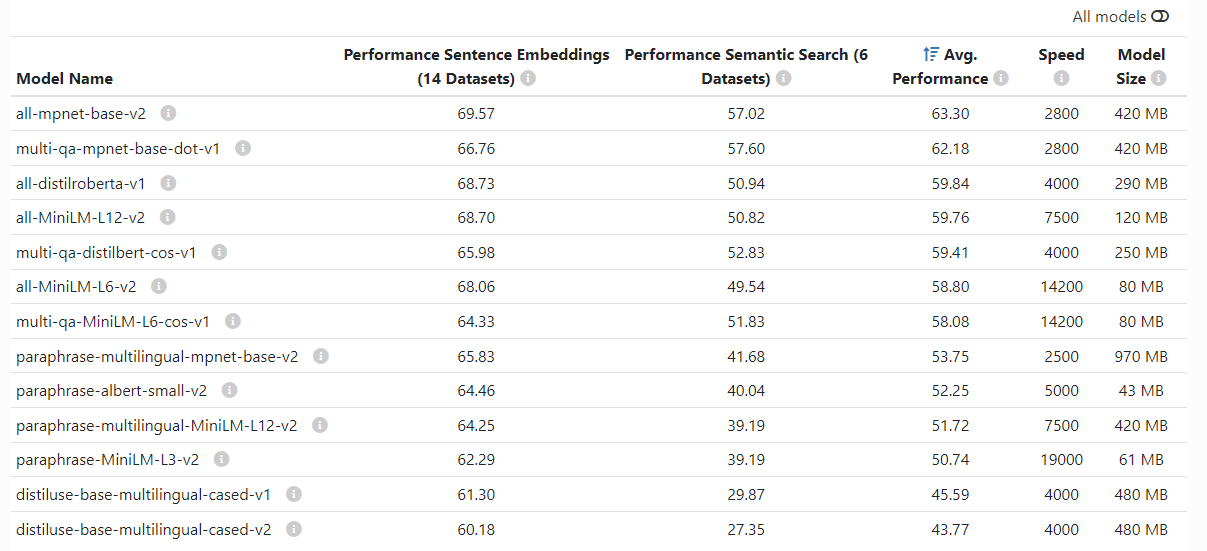

# Improvement??
đối với những câu hỏi có lừa. dùng thêm NER để tách

### Extract Person and rename

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
import re

def convert_name_NER(text):
    model_name = 'NlpHUST/ner-vietnamese-electra-base'
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForTokenClassification.from_pretrained(model_name)

    nlp = pipeline("ner", model=model, tokenizer=tokenizer)
    result = nlp(text)

    i = 1
    person_dict = {}
    for ent in result:
        ent_label = ent['entity']
        ent_start = ent['start']
        ent_end = ent['end']
        ent_word = ent['word']

        if ent_label == 'B-PERSON':
            if ent_word not in person_dict:
                replace_name = 'Person' + str(i)
                person_dict[ent_word] = replace_name
                i += 1
            else:
                replace_name = person_dict[ent_word]

    modified_text = []
    words = re.findall(r'\w+|[.,?!]', text)
    for word in words:
        if word in person_dict:
            word = person_dict[word]
        modified_text.append(word)

    sentence = ' '.join(modified_text)

    return sentence

In [ ]:
!pip install deep_translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.2 MB/s eta 0:00:00


In [ ]:
from deep_translator import GoogleTranslator
translator = GoogleTranslator(source='vi', target='en')

question = '''
Tiểu Đường bị viêm cột sống, còn Nam bị tiêu chảy. Hỏi bệnh của Nam thuộc nhóm bệnh lý nào?
'''
new_question = convert_name_NER(question)

trans_question = translator.translate(new_question)
print('câu hỏi được dịch: ',trans_question)

get_context_from_question(trans_question)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


câu hỏi được dịch:  Dia Duong has spondylitis, and Person1 has diarrhea. Ask, which group of diseases does Person1 belong to?


[['Viêm màng não mô cầu',
  'en: Meningococcal disease is divided into 4 groups: A, B, C and D. Meningococcal meningitis group A is the most common group of meningococcal disease in our country.'],
 ['Tiêu chảy',
  'en: Diarrheal diseases occur widely every year, are contagious and can spread into an epidemic. Accordingly, the Ministry of Health recommends that those who are in the high-risk group include: People who regularly eat, drink and live close to patients with diarrhea but do not apply preventive measures. Inhabitants living in areas where hygienic latrines are used, their feces go straight to sluices, ponds, lakes, rivers, springs and ditches. They use polluted and unhygienic water sources. They have unsanitary eating habits, regularly eat raw vegetables, undercooked aquatic and marine products. They use fresh and untreated manure in cultivation. Inhabitants living in flooded or post-flooded areas.'],
 ['Tiêu chảy',
  'en: Diarrhoea (diarrhoea) is one of the most common gastr

### BIO- MED NER for Dease Detector

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.3/en_ner_bc5cdr_md-0.5.3.tar.gz -q
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.3/en_ner_bionlp13cg_md-0.5.3.tar.gz -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# Spacy code to extract BIO-MED NERen_ner_bionlp13cg_md

import spacy

nlp1 = spacy.load("en_ner_bc5cdr_md") # demo in github allen AI scispacy
nlp2 = spacy.load("en_ner_bionlp13cg_md")

In [ ]:
text = '''
Ovarian cancer is a malignant tumor that originates from one or both ovaries. According to statistics, the incidence of ovarian cancer is about 4.6/100,000 women. How do doctors diagnose the cause? this disease
'''
doc1 = nlp1(text)
doc2 = nlp2(text)

for ent in doc1.ents:
      print(ent.text, ent.label_)

print('**************')

for ent in doc2.ents:
      print(ent.text, ent.label_)

Ovarian cancer DISEASE
malignant tumor DISEASE
ovarian cancer DISEASE
**************
Ovarian cancer CANCER
malignant tumor CANCER
ovaries ORGAN
ovarian cancer CANCER
women ORGANISM


# FRENCH DATASET + CONTEXT from Corpus TAM ANH

In [ ]:
!pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.6 MB/s eta 0:00:00


In [ ]:
from datasets import load_from_disk
import pandas as pd

french_dataset = load_from_disk('/content/drive/MyDrive/french')
french_dataset

DatasetDict({
    train: Dataset({
        features: ['correct_answers', 'number_correct_answers', 'trans_question', 'trans_answer_a', 'trans_answer_b', 'trans_answer_c', 'trans_answer_d', 'trans_answer_e'],
        num_rows: 2171
    })
    validation: Dataset({
        features: ['correct_answers', 'number_correct_answers', 'trans_question', 'trans_answer_a', 'trans_answer_b', 'trans_answer_c', 'trans_answer_d', 'trans_answer_e'],
        num_rows: 312
    })
    test: Dataset({
        features: ['correct_answers', 'number_correct_answers', 'trans_question', 'trans_answer_a', 'trans_answer_b', 'trans_answer_c', 'trans_answer_d', 'trans_answer_e'],
        num_rows: 622
    })
})

In [ ]:
import pandas as pd

train = pd.DataFrame(french_dataset['train'])
valid = pd.DataFrame(french_dataset['validation'])
test = pd.DataFrame(french_dataset['test'])


In [ ]:
train.sample(5, random_state=10)

,correct_answers,number_correct_answers,trans_question,trans_answer_a,trans_answer_b,trans_answer_c,trans_answer_d,trans_answer_e
1365,[4],0,"Among the following proposals, which one appli...",A low brake test confirms a diagnosis of Cushi...,Plasma cortisol high at 8 a.m. is sufficient t...,Hypertrophy of the extremities is frequently o...,The etiology is mostly cancerous,"If the cause is a adrenal adenoma, the cortiso..."
199,"[0, 4]",1,"Among the following proposals, indicate which ...",Heavy metals,Hydrogen,Of a mixture of sugars,Protein,Multiple elements in the same sample
68,"[0, 4]",1,"Among the following markers, indicate the one ...",Osteocalcin (serum),Pyridinolines (urinary),Tartaric acid-resistant phosphatease (serum),Glycosides of hydroxylysine (urinary),Bone alkaline phosphate (serum)
799,"[0, 1, 2]",2,Indicate the proposal(s) that corresponds to t...,It activates the opening of the potassium chan...,It increases the rate of intracellular cyclic GMP,It may lead to the appearance of aphtes and ul...,It is administered periodically in order to av...,It may be associated with sildenafil
822,"[1, 2]",1,What is the antihypertensive agent(s) for whic...,Methyldopa (ALDOMET®),Captopril (LOPRIL®),Valsartan (TAREG®),Nicardipine (LOXEN®),Atenol (TENORMINE®)


In [ ]:
question = train['trans_question'][68]
print(question)

get_context_from_question(question)

NameError: ignored

# MED MCQA DATASET

In [ ]:
from datasets import load_dataset

medmcqa_train = load_dataset('medmcqa', split='train')

Generating train split:   0%|          | 0/182822 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/6150 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4183 [00:00<?, ? examples/s]

In [ ]:
medmcqa_train

Dataset({
    features: ['id', 'question', 'opa', 'opb', 'opc', 'opd', 'cop', 'choice_type', 'exp', 'subject_name', 'topic_name'],
    num_rows: 182822
})

In [ ]:
medmcqa_train = pd.DataFrame(medmcqa_train)
medmcqa_train = medmcqa_train.drop(columns='id')

medmcqa_train.sample(3, random_state=10)

,question,opa,opb,opc,opd,cop,choice_type,exp,subject_name,topic_name
82289,Enophthalmos is seen in ?,Blow out fracture of orbit wall,Hypehyroidism,Radiation Injuries,Diabetes mellitus,0,multi,"Ans. is 'a' i.e., Blow out fracture of orbit w...",Ophthalmology,None
53788,XDR-TB is defined as Resistance to:,INH plus rifampicin,Fluoroquinolones plus INH plus amikacin,Fluoroquinolones plus rifampicin plus kanamycin,Fluoroquinolones plus INH plus rifampicin plus...,3,single,"Ans. is. 'd' i. e., Fluoroquinolones plus INH ...",Microbiology,None
47976,Vit-K deficiency is indicated by:,Low platelet count,Increased prothrombin time,Decreased prothrombin time,None of the above,1,multi,None,Biochemistry,None


In [ ]:
question = medmcqa_train['question'][20000]
explain = medmcqa_train['exp'][20000]
print(question)
print(explain)

get_context_from_question(question)

All of the following can be used in increased ICT except
(A) Ketamine # Complications of Ketamine:> Hypertension, tachycardia> Emergence delirium, nightmares, hallucinations (less frequent with intramuscular injection, least in elderly and below 15 yrs.)> Salivation, Increased intracranial pressure; Prolonged recovery.> Allergic reactions - Transient erythema/Morbilliform rash> Respiratory depression (dose dependent injection to be slow).


[['Bệnh Alzheimer',
  'en: Some people may experience changes in their ability to develop and implement plans or to work with numbers. So what was once considered familiar becomes increasingly difficult and unfamiliar to the person. For example, being unable to drive to a destination despite having traveled many times before, unable to calculate bills, or having difficulty reading, or using household items.'],
 ['Vô sinh nữ',
  'en: Assisted reproductive technologies are available and are effective in the treatment of infertility, some of which are common: Insemination: In IUI, healthy sperm are filtered, concentrated, and injected inside the uterus at ovulation to increase the chance of pregnancy. Follicle development and ovulation can be controlled by ovarian stimulation and ultrasound.'],
 ['U tuyến giáp ',
  'en: For example, if you are obese, try to lose weight; if you are smoking, quit; make sure you get enough iodine in your diet.'],
 ['Mất ngủ sau sinh',
  'en: fatigue, forgetf

## BIG BIO DATASET

In [ ]:
from datasets import load_dataset

bigbio_train = load_dataset('bigbio/med_qa', split='train')
bigbio_val = load_dataset('bigbio/med_qa', split='validation')

In [ ]:
import pandas as pd

bigbio_train = pd.DataFrame(bigbio_train)
bigbio_val = pd.DataFrame(bigbio_val)

bigbio_train.head(5)

,meta_info,question,answer_idx,answer,options
0,step2&3,A 23-year-old pregnant woman at 22 weeks gesta...,E,Nitrofurantoin,"[{'key': 'A', 'value': 'Ampicillin'}, {'key': ..."
1,step2&3,A 3-month-old baby died suddenly at night whil...,A,Placing the infant in a supine position on a f...,"[{'key': 'A', 'value': 'Placing the infant in ..."
2,step1,A mother brings her 3-week-old infant to the p...,A,Abnormal migration of ventral pancreatic bud,"[{'key': 'A', 'value': 'Abnormal migration of ..."
3,step1,A pulmonary autopsy specimen from a 58-year-ol...,A,Thromboembolism,"[{'key': 'A', 'value': 'Thromboembolism'}, {'k..."
4,step1,A 20-year-old woman presents with menorrhagia ...,E,Von Willebrand disease,"[{'key': 'A', 'value': 'Factor V Leiden'}, {'k..."


In [ ]:
options_train = {}
for index, row in bigbio_train.iterrows():
    optionList = row['options']
    option = []
    for item in optionList:
        option.append(item['value'])
    options_train[index] = option

options_val = {}
for index, row in bigbio_val.iterrows():
    optionList = row['options']
    option = []
    for item in optionList:
        option.append(item['value'])
    options_val[index] = option

In [ ]:
import pandas as pd

columns = ['option_a', 'option_b', 'option_c', 'option_d', 'option_e']
result_df_train = pd.DataFrame(columns=columns)
result_df_val= pd.DataFrame(columns=columns)

for index, option_list in options_train.items():
    row_data = {}
    for i in range(len(option_list)):
        row_data[columns[i]] = option_list[i]

    result_df_train = result_df_train.append(row_data, ignore_index=True)

result_df_train.index = options_train.keys()


for index, option_list in options_val.items():
    row_data = {}
    for i in range(len(option_list)):
        row_data[columns[i]] = option_list[i]

    result_df_val = result_df_val.append(row_data, ignore_index=True)

result_df_val.index = options_val.keys()

In [ ]:
bigbio_train = pd.concat([bigbio_train,result_df_train], axis=1)
bigbio_val = pd.concat([bigbio_val,result_df_val], axis=1)

In [ ]:
bigbio_val

,meta_info,question,answer_idx,answer,options,option_a,option_b,option_c,option_d,option_e
0,step1,A 21-year-old sexually active male complains o...,D,Ceftriaxone,"[{'key': 'A', 'value': 'Chloramphenicol'}, {'k...",Chloramphenicol,Gentamicin,Ciprofloxacin,Ceftriaxone,Trimethoprim
1,step2&3,A 5-year-old girl is brought to the emergency ...,A,Cyclic vomiting syndrome,"[{'key': 'A', 'value': 'Cyclic vomiting syndro...",Cyclic vomiting syndrome,Gastroenteritis,Hypertrophic pyloric stenosis,Gastroesophageal reflux disease,Acute intermittent porphyria
2,step1,A 40-year-old woman presents with difficulty f...,E,Trazodone,"[{'key': 'A', 'value': 'Diazepam'}, {'key': 'B...",Diazepam,St. John’s Wort,Paroxetine,Zolpidem,Trazodone
3,step2&3,A 37-year-old female with a history of type II...,C,Obtain a urine analysis and urine culture,"[{'key': 'A', 'value': 'Obtain an abdominal CT...",Obtain an abdominal CT scan,Obtain blood cultures,Obtain a urine analysis and urine culture,Begin intravenous treatment with ceftazidime,No treatment is necessary
4,step1,A 19-year-old boy presents with confusion and ...,A,Hypoperfusion,"[{'key': 'A', 'value': 'Hypoperfusion'}, {'key...",Hypoperfusion,Hyperglycemia,Metabolic acidosis,Hypokalemia,Hypophosphatemia
...,...,...,...,...,...,...,...,...,...,...
1267,step2&3,A 37-year-old man comes to the emergency depar...,D,Locate and remove tick,"[{'key': 'A', 'value': 'Perform enzyme‑linked ...",Perform enzyme‑linked immunosorbent assay,Administer doxycycline,Administer botulism antitoxin,Locate and remove tick,"Obtain cranial MRI\n"""
1268,step2&3,A 43-year-old man presents requesting a sleep ...,A,"Respond in a straightforward manner, be honest...","[{'key': 'A', 'value': 'Respond in a straightf...","Respond in a straightforward manner, be honest...",Encourage the patient to inform the police,Set rules and be firm with adhering to them,Always see these patients with a chaperone,Refer this patient to another physician
1269,step1,A 22-year-old man presents to the emergency ro...,B,Haloperidol,"[{'key': 'A', 'value': 'Citalopram'}, {'key': ...",Citalopram,Haloperidol,Phenelzine,Olanzapine,Alprazolam
1270,step1,A 42-year-old man is brought to the emergency ...,C,IV daptomycin,"[{'key': 'A', 'value': 'IV nafcillin'}, {'key'...",IV nafcillin,Dicloxacillin,IV daptomycin,IV vancomycin,Doxycycline


# Test Translation

## Google Translator

In [ ]:
!pip install deep_translator -q
from deep_translator import GoogleTranslator

def translate_text(text):
    translator = GoogleTranslator(source='vi', target='en')
    try:
        trans_text = translator.translate(text)
        return trans_text

    except Exception as e:
        return "Error: " + str(e)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.6 MB/s eta 0:00:00


In [ ]:
text = 'Những người đang mang thai hoặc mãn kinh thường bị xáo trộn các tuyến nội tiết cũng dễ mắc bệnh nhiễm trùng đường tiết niệu.  2. Nhiễm bệnh lây truyền qua đường tình dục (STIs)  Tiểu buốt cũng có thể là dấu hiệu của tình trạng nhiễm các bệnh lây truyền qua đường tình dục (STIs) bao gồm mụn rộp sinh dục, bệnh lậu và nấm chlamydia. Các bệnh lây truyền qua đường tình dục đôi khi không có triệu chứng, nhưng vẫn có khả năng lây lan vào đường tiết niệu, khiến cho người bệnh bị tiểu buốt. Do đó, người có hoạt động tình dục nên đi xét nghiệm để kiểm soát bệnh tốt hơn.   3. Viêm tuyến tiền liệt  Đây là tình trạng đặc thù của nam giới. Khi bị viêm tuyến tiền liệt, người bệnh có biểu hiện tiểu buốt, tiểu lắt nhắt, đau tức vùng bụng dưới, khám hậu môn ghi nhận tuyến tiền liệt căng đau nhiều.  4.Viêm bàng quang  Một nguyên nhân khác gây ra tiểu buốt là viêm bàng quang, viêm niêm mạc bàng quang, viêm bàng quang kẽ… Các triệu chứng này còn bao gồm đau và căng ở vùng bàng quang và vùng chậu. Trong một số trường hợp, xạ trị có thể gây đau bàng quang và ảnh hưởng đến các cơ quan khác của đường tiết niệu. Tình trạng này được gọi là viêm bàng quang do bức xạ.  5. Viêm niệu đạo  Viêm niệu đạo thường là do vi khuẩn tấn công. Tình trạng này không chỉ khiến cho người bệnh đau buốt khi đi tiểu mà còn có thể làm tăng cảm giác muốn đi tiểu thường xuyên.  6. Viêm mào tinh hoàn  Đi tiểu buốt cũng có thể do bị viêm mào tinh hoàn ở nam giới. Mào tinh hoàn nằm ở phía sau của tinh hoàn, có chức năng lưu trữ và vận chuyển tinh trùng từ tinh hoàn.'

In [ ]:
%%time
translate_text(text)

CPU times: user 101 ms, sys: 0 ns, total: 101 ms
Wall time: 1.41 s


'People who are pregnant or postmenopausal often have disorders of the endocrine glands and are also susceptible to urinary tract infections. 2. Sexually transmitted infections (STIs) Painful urination can also be a sign of sexually transmitted infections (STIs) including genital herpes, gonorrhea and chlamydia. Sexually transmitted diseases sometimes have no symptoms, but can still spread to the urinary tract, causing the patient to have painful urination. Therefore, sexually active people should get tested to better control the disease. 3. Prostatitis This is a condition specific to men. When suffering from prostatitis, the patient has symptoms of painful urination, frequent urination, pain in the lower abdomen, and anal examination notes that the prostate gland is very tense and painful. 4. Cystitis Another cause of painful urination is cystitis, inflammation of the bladder mucosa, interstitial cystitis... These symptoms also include pain and tenderness in the bladder and pelvic are

## VietAI & Helsinki

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
def translate_paragraphs1(paragraphs: list):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    model_name = "VietAI/envit5-translation"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)

    translated_paragraphs = []
    # Append tag vi
    paragraphs = ['vi: '+ paragraph for paragraph in paragraphs]

    # Encode the batch of paragraphs
    inputs = tokenizer(paragraphs, return_tensors="pt", padding='longest', truncation=True, max_length=1680)
    input_ids = inputs.input_ids.to(device)
    attention_mask = inputs.attention_mask.to(device)

    # Generate translations for the batch
    outputs = model.generate(input_ids, attention_mask=attention_mask, max_length=2040)
    translated_texts = tokenizer.batch_decode(outputs, skip_special_tokens=True)

    translated_paragraphs.extend(translated_texts)
    return translated_paragraphs

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
def translate_paragraphs2(paragraphs: list):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    model_name = 'Helsinki-NLP/opus-mt-vi-en'
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)

    translated_paragraphs = []

    # Encode the batch of paragraphs
    inputs = tokenizer(paragraphs, return_tensors="pt", padding='longest', truncation=True, max_length=2040)
    input_ids = inputs.input_ids.to(device)
    attention_mask = inputs.attention_mask.to(device)

    # Generate translations for the batch
    outputs = model.generate(input_ids, attention_mask=attention_mask, max_length=2040)
    translated_texts = tokenizer.batch_decode(outputs, skip_special_tokens=True)

    translated_paragraphs.extend(translated_texts)
    return translated_paragraphs

In [ ]:
%%time
translate_paragraphs1(['Hương và an là đôi bạn thân, Hương bị rau tiền đạo, còn An bị virut ban đỏ',
                      'Cách phòng bệnh sốt xuất huyết',
                      'Tiểu buốt là một thuật ngữ khá rộng, dùng để mô tả cảm giác nóng rát, nhói đau mỗi khi đi tiểu, nó gây nhiều phiền toái cho người bệnh. ',
                      'Những người đang mang thai hoặc mãn kinh thường bị xáo trộn các tuyến nội tiết cũng dễ mắc bệnh nhiễm trùng đường tiết niệu.  2. Nhiễm bệnh lây truyền qua đường tình dục (STIs)  Tiểu buốt cũng có thể là dấu hiệu của tình trạng nhiễm các bệnh lây truyền qua đường tình dục (STIs) bao gồm mụn rộp sinh dục, bệnh lậu và nấm chlamydia. Các bệnh lây truyền qua đường tình dục đôi khi không có triệu chứng, nhưng vẫn có khả năng lây lan vào đường tiết niệu, khiến cho người bệnh bị tiểu buốt. Do đó, người có hoạt động tình dục nên đi xét nghiệm để kiểm soát bệnh tốt hơn.   3. Viêm tuyến tiền liệt  Đây là tình trạng đặc thù của nam giới. Khi bị viêm tuyến tiền liệt, người bệnh có biểu hiện tiểu buốt, tiểu lắt nhắt, đau tức vùng bụng dưới, khám hậu môn ghi nhận tuyến tiền liệt căng đau nhiều.  4.Viêm bàng quang  Một nguyên nhân khác gây ra tiểu buốt là viêm bàng quang, viêm niêm mạc bàng quang, viêm bàng quang kẽ… Các triệu chứng này còn bao gồm đau và căng ở vùng bàng quang và vùng chậu. Trong một số trường hợp, xạ trị có thể gây đau bàng quang và ảnh hưởng đến các cơ quan khác của đường tiết niệu. Tình trạng này được gọi là viêm bàng quang do bức xạ.  5. Viêm niệu đạo  Viêm niệu đạo thường là do vi khuẩn tấn công. Tình trạng này không chỉ khiến cho người bệnh đau buốt khi đi tiểu mà còn có thể làm tăng cảm giác muốn đi tiểu thường xuyên.  6. Viêm mào tinh hoàn  Đi tiểu buốt cũng có thể do bị viêm mào tinh hoàn ở nam giới. Mào tinh hoàn nằm ở phía sau của tinh hoàn, có chức năng lưu trữ và vận chuyển tinh trùng từ tinh hoàn.'
                      ])

CPU times: user 6.18 s, sys: 1.67 s, total: 7.84 s
Wall time: 14 s


['en: Hương and An are best friends, Huong has prodromal chancre, An has erythema nodosum leprosum.',
 'en: Precaution against dengue fever',
 'en: A painful urination is a broad term used to describe the burning, stinging sensation of urinating that can be very distressing to the person.',
 'en: 2. STIs.']

In [ ]:
%%time
translate_paragraphs2(['Hương và an là đôi bạn thân, Hương bị rau tiền đạo, còn An bị virut ban đỏ',
                      'Cách phòng bệnh sốt xuất huyết',
                      'Tiểu buốt là một thuật ngữ khá rộng, dùng để mô tả cảm giác nóng rát, nhói đau mỗi khi đi tiểu, nó gây nhiều phiền toái cho người bệnh. ',
                      'Những người đang mang thai hoặc mãn kinh thường bị xáo trộn các tuyến nội tiết cũng dễ mắc bệnh nhiễm trùng đường tiết niệu.  2. Nhiễm bệnh lây truyền qua đường tình dục (STIs)  Tiểu buốt cũng có thể là dấu hiệu của tình trạng nhiễm các bệnh lây truyền qua đường tình dục (STIs) bao gồm mụn rộp sinh dục, bệnh lậu và nấm chlamydia. Các bệnh lây truyền qua đường tình dục đôi khi không có triệu chứng, nhưng vẫn có khả năng lây lan vào đường tiết niệu, khiến cho người bệnh bị tiểu buốt. Do đó, người có hoạt động tình dục nên đi xét nghiệm để kiểm soát bệnh tốt hơn.   3. Viêm tuyến tiền liệt  Đây là tình trạng đặc thù của nam giới. Khi bị viêm tuyến tiền liệt, người bệnh có biểu hiện tiểu buốt, tiểu lắt nhắt, đau tức vùng bụng dưới, khám hậu môn ghi nhận tuyến tiền liệt căng đau nhiều.  4.Viêm bàng quang  Một nguyên nhân khác gây ra tiểu buốt là viêm bàng quang, viêm niêm mạc bàng quang, viêm bàng quang kẽ… Các triệu chứng này còn bao gồm đau và căng ở vùng bàng quang và vùng chậu. Trong một số trường hợp, xạ trị có thể gây đau bàng quang và ảnh hưởng đến các cơ quan khác của đường tiết niệu. Tình trạng này được gọi là viêm bàng quang do bức xạ.  5. Viêm niệu đạo  Viêm niệu đạo thường là do vi khuẩn tấn công. Tình trạng này không chỉ khiến cho người bệnh đau buốt khi đi tiểu mà còn có thể làm tăng cảm giác muốn đi tiểu thường xuyên.  6. Viêm mào tinh hoàn  Đi tiểu buốt cũng có thể do bị viêm mào tinh hoàn ở nam giới. Mào tinh hoàn nằm ở phía sau của tinh hoàn, có chức năng lưu trữ và vận chuyển tinh trùng từ tinh hoàn.'
                      ])

CPU times: user 5.23 s, sys: 285 ms, total: 5.51 s
Wall time: 6.01 s


['Xiang and Peace are best friends. Xiang has a profection, and An has a red rash.',
 'How to deal with DHF',
 'The chill is a fairly broad term used to describe the intense, stinging sensation of urinating, which causes much trouble to the sufferer.',
 "People who are pregnant or ovarian are often disturbed by endocrine glands, which are also susceptible to ovarian infections. 2, sexually transmitted diseases (STIs) can also be a sign of the infection of sexually transmitted diseases (STIs) which are also easily infected with acnema, chlamydia, sexually transmitted diseases that sometimes don't have any symptoms, but can still be a sign of the infection, which is causing people to have diarrhea."]

In [ ]:
model_name = "VietAI/envit5-translation"
tokenizer = AutoTokenizer.from_pretrained(model_name)

long_text = 'Tiểu buốt là một thuật ngữ khá rộng, dùng để mô tả cảm giác nóng rát, nhói đau mỗi khi đi tiểu, nó gây nhiều phiền toái cho người bệnh. Đây là kết quả của sự kích thích bàng quang, niệu đạo. Nguyên nhân hay gặp nhất gây tiểu buốt là do nhiễm trùng đường tiết niệu dưới (viêm bàng quang, niệu đạo, tuyến tiền liệt), nhưng cũng có thể là nhiễm trùng đường tiết niệu trên (viêm thận, niệu quản). Tình trạng tiểu buốt thường xuất hiện ở nữ giới trong độ tuổi từ 20-50 và nam giới tuổi cao, ít gặp ở nam giới trẻ tuổi do liên quan tới bệnh lý tăng sản tuyến tiền liệt. Nguyên nhân đi tiểu buốt Theo các chuyên gia tiết niệu, Trung tâm Tiết niệu Thận học, tình trạng tiểu buốt xuất phát từ nhiều nguyên nhân và rất dễ gây nhầm lẫn như: 1. Nhiễm trùng đường tiết niệu  Đi tiểu đau rát là một dấu hiệu phổ biến của tình trạng nhiễm trùng đường tiết niệu (Urinary Tract Infection – UTI). Nguyên nhân gây bệnh thường do vi khuẩn sống ở vùng đại tràng, hậu môn như E.Coli (chiếm 80% nguyên nhân gây bệnh) bội nhiễm ngược dòng vào đường tiểu của người bệnh qua quá trình sinh hoạt, quan hệ tình dục… Tình trạng viêm ở bất kỳ cơ quan nào trong đường tiết niệu như: bàng quang, niệu quản, niệu đạo, thận… đều có thể gây đau khi đi tiểu. Do cấu tạo niệu đạo ngắn nên nữ giới có nhiều nguy cơ nhiễm trùng tiểu hơn nam giới. Những người đang mang thai hoặc mãn kinh thường bị xáo trộn các tuyến nội tiết cũng dễ mắc bệnh nhiễm trùng đường tiết niệu.  2. Nhiễm bệnh lây truyền qua đường tình dục (STIs)  Tiểu buốt cũng có thể là dấu hiệu của tình trạng nhiễm các bệnh lây truyền qua đường tình dục (STIs) bao gồm mụn rộp sinh dục, bệnh lậu và nấm chlamydia. Các bệnh lây truyền qua đường tình dục đôi khi không có triệu chứng, nhưng vẫn có khả năng lây lan vào đường tiết niệu, khiến cho người bệnh bị tiểu buốt. Do đó, người có hoạt động tình dục nên đi xét nghiệm để kiểm soát bệnh tốt hơn.   3. Viêm tuyến tiền liệt  Đây là tình trạng đặc thù của nam giới. Khi bị viêm tuyến tiền liệt, người bệnh có biểu hiện tiểu buốt, tiểu lắt nhắt, đau tức vùng bụng dưới, khám hậu môn ghi nhận tuyến tiền liệt căng đau nhiều.  4.Viêm bàng quang  Một nguyên nhân khác gây ra tiểu buốt là viêm bàng quang, viêm niêm mạc bàng quang, viêm bàng quang kẽ… Các triệu chứng này còn bao gồm đau và căng ở vùng bàng quang và vùng chậu. Trong một số trường hợp, xạ trị có thể gây đau bàng quang và ảnh hưởng đến các cơ quan khác của đường tiết niệu. Tình trạng này được gọi là viêm bàng quang do bức xạ.  5. Viêm niệu đạo  Viêm niệu đạo thường là do vi khuẩn tấn công. Tình trạng này không chỉ khiến cho người bệnh đau buốt khi đi tiểu mà còn có thể làm tăng cảm giác muốn đi tiểu thường xuyên.  6. Viêm mào tinh hoàn  Đi tiểu buốt cũng có thể do bị viêm mào tinh hoàn ở nam giới. Mào tinh hoàn nằm ở phía sau của tinh hoàn, có chức năng lưu trữ và vận chuyển tinh trùng từ tinh hoàn.'
len(tokenizer(long_text)['input_ids'])

698

# Process new file for embeddings

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/combined_title_content_break430_231111.csv')

In [ ]:
df

,Unnamed: 0,Url,Combined_Content,Combined_Length
0,0,alzheimer,What is Alzheimer's disease? Alzheimer's is a ...,415
1,1,alzheimer,"Reason. Therefore, the brain is considered a g...",393
2,2,alzheimer,Common symptoms of Alzheimer's syndrome. The s...,384
3,3,alzheimer,Common symptoms of Alzheimer's syndrome. Many ...,371
4,4,alzheimer,Complications. Pneumonia: This is a condition ...,416
...,...,...,...,...
2977,2977,ung-thu-phoi-khong-te-bao-nho-giai-doan-3,TNM staging system in stage III non-small cell...,434
2978,2978,ung-thu-phoi-khong-te-bao-nho-giai-doan-3,TNM staging system in stage III non-small cell...,309
2979,2979,ung-thu-phoi-khong-te-bao-nho-giai-doan-3,TNM staging system in stage III non-small cell...,377
2980,2980,ung-thu-vu-giai-doan-2,Classification of stage II breast cancer. The ...,431


In [ ]:
df['Combined_Content_2'] = df['Combined_Content_2'].apply(lambda x: x.replace(', System,', ''))

In [ ]:
df.loc[df['Combined_Content_2'].str.contains('department')][['Combined_Content','Combined_Content_2']]

In [ ]:
df = df.drop(columns=['Combined_Content','Combined_Length'])

In [ ]:
df.to_csv('')

,Url,Combined_Content_2
0,alzheimer,What is Alzheimer's disease? Alzheimer's is a ...
1,alzheimer,"Reason. Therefore, the brain is considered a g..."
2,alzheimer,Common symptoms of Alzheimer's syndrome. The s...
3,alzheimer,Common symptoms of Alzheimer's syndrome. Many ...
4,alzheimer,Complications. Pneumonia: This is a condition ...
...,...,...
2977,ung-thu-phoi-khong-te-bao-nho-giai-doan-3,TNM staging system in stage III non-small cell...
2978,ung-thu-phoi-khong-te-bao-nho-giai-doan-3,TNM staging system in stage III non-small cell...
2979,ung-thu-phoi-khong-te-bao-nho-giai-doan-3,TNM staging system in stage III non-small cell...
2980,ung-thu-vu-giai-doan-2,Classification of stage II breast cancer. The ...


In [ ]:
df.to_csv('/content/drive/MyDrive/data_break430_231111.csv')

## SUMMARY TEXT

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/data_break430_231111.csv').drop(columns='Unnamed: 0')

In [ ]:
from transformers import AutoTokenizer

model_name = 'facebook/bart-large-cnn'
tokenizer = AutoTokenizer.from_pretrained(model_name)

def get_tokenized_length(row):
    content = row['Combined_Content_2']
    tokenized = tokenizer.encode_plus(content, truncation=True)
    length = len(tokenized['input_ids'])
    return length

df['Token_Length'] = df.apply(get_tokenized_length, axis=1)

In [ ]:
df['Word_Count'] = df['Combined_Content_2'].apply(lambda x: len(x.split()))

In [ ]:
df.shape

(2982, 4)

In [ ]:
df.head(3)

,Url,Combined_Content_2,Token_Length,Word_Count
0,alzheimer,What is Alzheimer's disease? Alzheimer's is a ...,529,414
1,alzheimer,"Reason. Therefore, the brain is considered a g...",493,393
2,alzheimer,Common symptoms of Alzheimer's syndrome. The s...,454,384


In [ ]:
# google/pegasus-large
from transformers import pipeline

summarizer = pipeline("summarization", model='facebook/bart-large-cnn', device=0, batch_size=10)  # <---- Chỉnh batch_size lớn =20 cho nhanh, chú ý RAM

def summarize_text_batch(examples):
    content_batch = examples['Combined_Content_2']
    summary_batch = summarizer(content_batch, min_length=300, max_length=450)

    examples['summary'] = [summary_batch[i]['summary_text'] for i in range(len(summary_batch))]

    return examples

# Lưu ý: đối với text len < max_length : model nó sẽ thêm info bên ngoài vào để cho đủ. Vì thế nên loại bỏ trước và giữ content nào cần sum

In [ ]:
df_for_sum = df.loc[df['Token_Length'] > 460].reset_index()

In [ ]:
df_for_sum.head(3)

,index,Url,Combined_Content_2,Token_Length,Word_Count
0,0,alzheimer,What is Alzheimer's disease? Alzheimer's is a ...,529,414
1,1,alzheimer,"Reason. Therefore, the brain is considered a g...",493,393
2,4,alzheimer,Complications. Pneumonia: This is a condition ...,538,416


In [ ]:
df_for_sum_hf = datasets.Dataset.from_pandas(df_for_sum)

In [ ]:
df_for_sum_hf = df_for_sum_hf.map(summarize_text_batch, batched=True)

Chạy xong rồi thì ghép index của mấy file dc summarize trở lại cái đầu vì mình chỉ lựa đoạn dài để chạy